# Carbon Dioxide Emmission Model

This analysis and model is done on the emmissions from various countries and continents. The model aims at predicting the emmissions of carbon dioxide. I take a dive into discovering the nations contributing the highest contribution of Carbon (iv) oxide into the atmosphere and merging the result to obtain the main practices/economic practices within the country.

### Data Loading

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Exploratory Data Analysis

In [2]:
df= pd.read_csv('Carbon_(CO2)_Emissions_by_Country.csv',delimiter=',')
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [4]:
df.isna().sum()

Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64

There is no category with a null value. The dataset is complete.

In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 5677 rows and 5 columns.


In [6]:
df['Region'].value_counts()

Region
Africa      1585
Asia        1398
Europe      1230
Americas    1050
Oceania      414
Name: count, dtype: int64

Majority of the entries are from Africa.

In [7]:
africa_count = len(df[df['Region']=="Africa"].Country.unique())
asia_count =  len(df[df['Region']=="Asia"].Country.unique())
Europe_count = len(df[df['Region']=="Europe"].Country.unique())
America_count = len(df[df['Region']=="Americas"].Country.unique())
Oceania_count = len(df[df['Region']=="Oceania"].Country.unique())
print("In this dataset the distribution of countries per continent is as shown:\n")
print(f'Africa has {africa_count} countries,')
print(f'Asia has {asia_count} countries,')
print(f'Europe has {Europe_count} countries,')
print(f'America has {America_count} countries,')
print(f'Oceania has {Oceania_count} countries')

In this dataset the distribution of countries per continent is as shown:

Africa has 53 countries,
Asia has 47 countries,
Europe has 41 countries,
America has 35 countries,
Oceania has 14 countries


In [8]:
df.sort_values(by='Kilotons of Co2',ascending=False)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
1050,China,Asia,01-01-2019,10707219.73,7.61
1051,China,Asia,01-01-2018,10502929.69,7.49
1052,China,Asia,01-01-2017,10096009.77,7.23
1053,China,Asia,01-01-2014,10006669.92,7.29
1054,China,Asia,01-01-2013,9984570.31,7.32
...,...,...,...,...,...
5278,Tuvalu,Oceania,01-01-1999,10.00,1.04
5277,Tuvalu,Oceania,01-01-1998,10.00,1.04
5276,Tuvalu,Oceania,01-01-1997,10.00,1.04
3084,Mali,Africa,01-01-1997,10.00,0.00


China has the highest contribution of Carbon dioxide emissions from the dataset at 10707.21973 Metric Tonnes at the beginning of 2019. The Production of Carbon dioxide has been on the rise in China over the years

Africa having the highest number of countries, the amount of carbon dioxide released into the atmosphere is the second last after Oceania with only 14 countries. This could be assumed to be contributed by the levels of industrialisation and relying on the use of Coal to run the industries and powerplants.

In [9]:
dfa = df["Metric Tons Per Capita"].groupby(df["Region"]).mean().sort_values(ascending=False)
dfa

Region
Europe      7.222740
Asia        6.152303
Oceania     3.801449
Americas    3.646733
Africa      1.052448
Name: Metric Tons Per Capita, dtype: float64

In [10]:
dfb = df['Kilotons of Co2'].groupby(df['Region']).mean().sort_values(ascending=False)
dfb

Region
Asia        262610.714557
Americas    204381.210200
Europe      145825.438943
Oceania      27821.352633
Africa       18387.753950
Name: Kilotons of Co2, dtype: float64

Europe has the highest average Metric Tons per Capita at 7.22  while Africa had the least at 1.05.
Asia had the highest average of carbon dioxide emmitted into the atmosphere. Americas had an average of 3. Metric tons per capita while it has the second highest average of carbon dioxide emmitted into the atmosphere.

### Carbon dioxide Emmissions

#### Population size Factor

In [11]:
Regions = ["Europe", "Asia", "Oceania", "Americas", "Africa"]
dfc = pd.DataFrame(columns=["Region","Population Emmitter"])
for i in range(len(Regions)):
    Population_emmitter = (dfa.loc[Regions[i]]*1000/dfb.loc[Regions[i]])
    dfc = pd.concat([dfc, pd.DataFrame({"Region": [Regions[i]], "Population Emmitter": [Population_emmitter]})], ignore_index=True)
dfc

C:\Users\Victor Karanja\AppData\Local\Temp\ipykernel_9016\3788893491.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfc = pd.concat([dfc, pd.DataFrame({"Region": [Regions[i]], "Population Emmitter": [Population_emmitter]})], ignore_index=True)


,Region,Population Emmitter
0,Europe,0.049530
1,Asia,0.023427
2,Oceania,0.136638
3,Americas,0.017843
4,Africa,0.057236


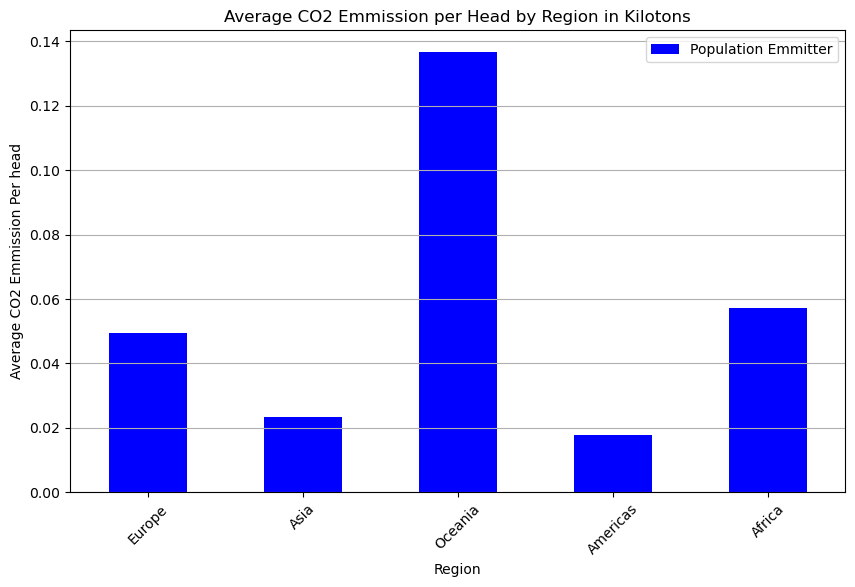

In [12]:
dfc.plot(x='Region', y='Population Emmitter', kind='bar', color='blue', figsize=(10, 6))
plt.title('Average CO2 Emmission per Head by Region in Kilotons')
plt.xlabel('Region')
plt.ylabel('Average CO2 Emmission Per head')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The analysis above shows that Oceania region has the highest average Carbon Dioxide emmission rate per head in the duration. Americas on the other hand had the least carbon emission per head.

Africa and Oceania both have a high emmission rate per individual while the amount of carbon dioxide emitted by the whole region is among the least. while considering both the metric tonnes per capita and mass produced.

#### Metric Tonnes Analysis

<Axes: title={'center': 'Metric Tons Per Capita For the Regions'}, xlabel='Region'>

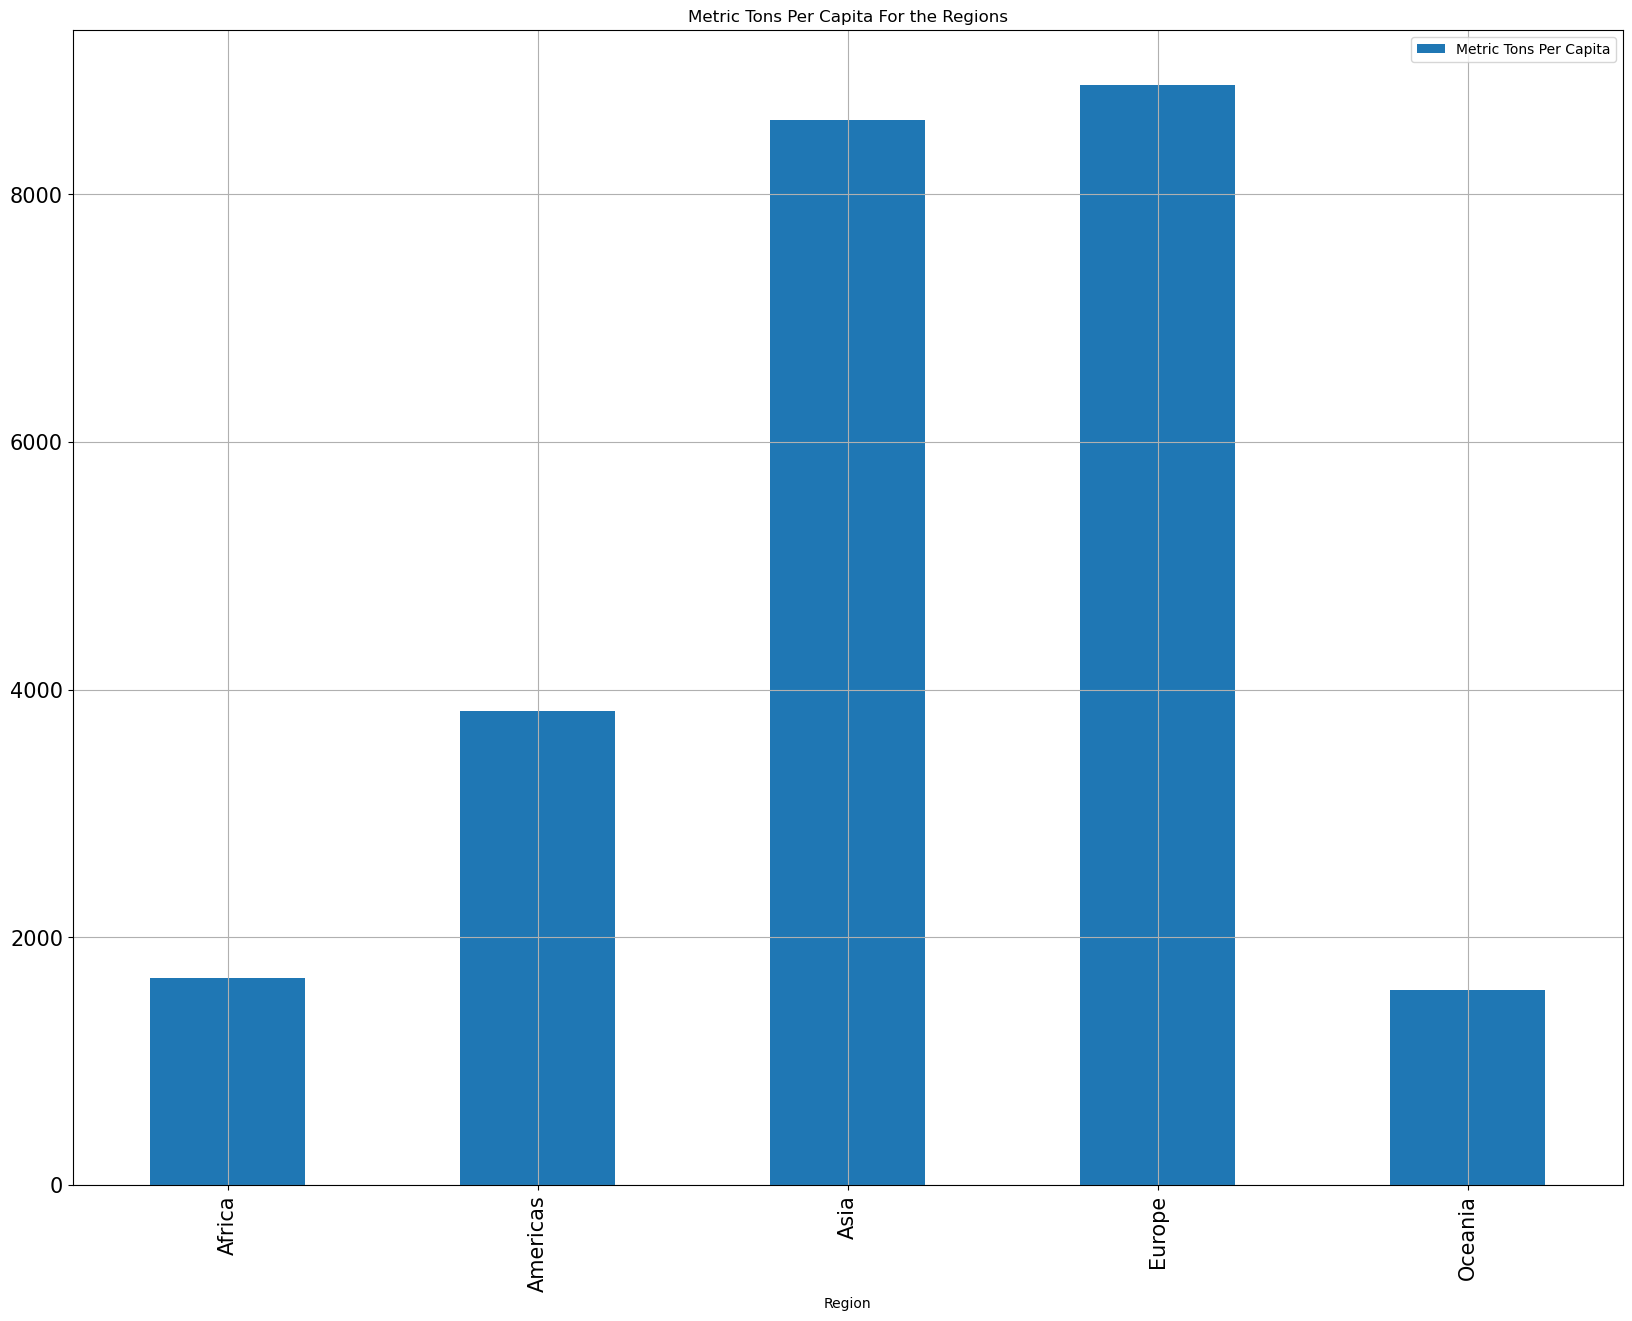

In [13]:
df['year'] = [df['Date'].astype('str').iloc[i].split('-')[-1] for i in range(len(df))]
df['year'] = df['year'].astype('int')
df3= df.groupby(by='Region').sum()
df3.plot(kind='bar',y='Metric Tons Per Capita',figsize=(20,15),rot=90,
         title='Metric Tons Per Capita For the Regions',fontsize=15,grid=True)

C:\Users\Victor Karanja\AppData\Local\Temp\ipykernel_9016\3625110111.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2a = df2[df['year']<=2015]


<Axes: title={'center': 'Metric Tons Per Capita For the Regions(1996-2015)'}, xlabel='Region'>

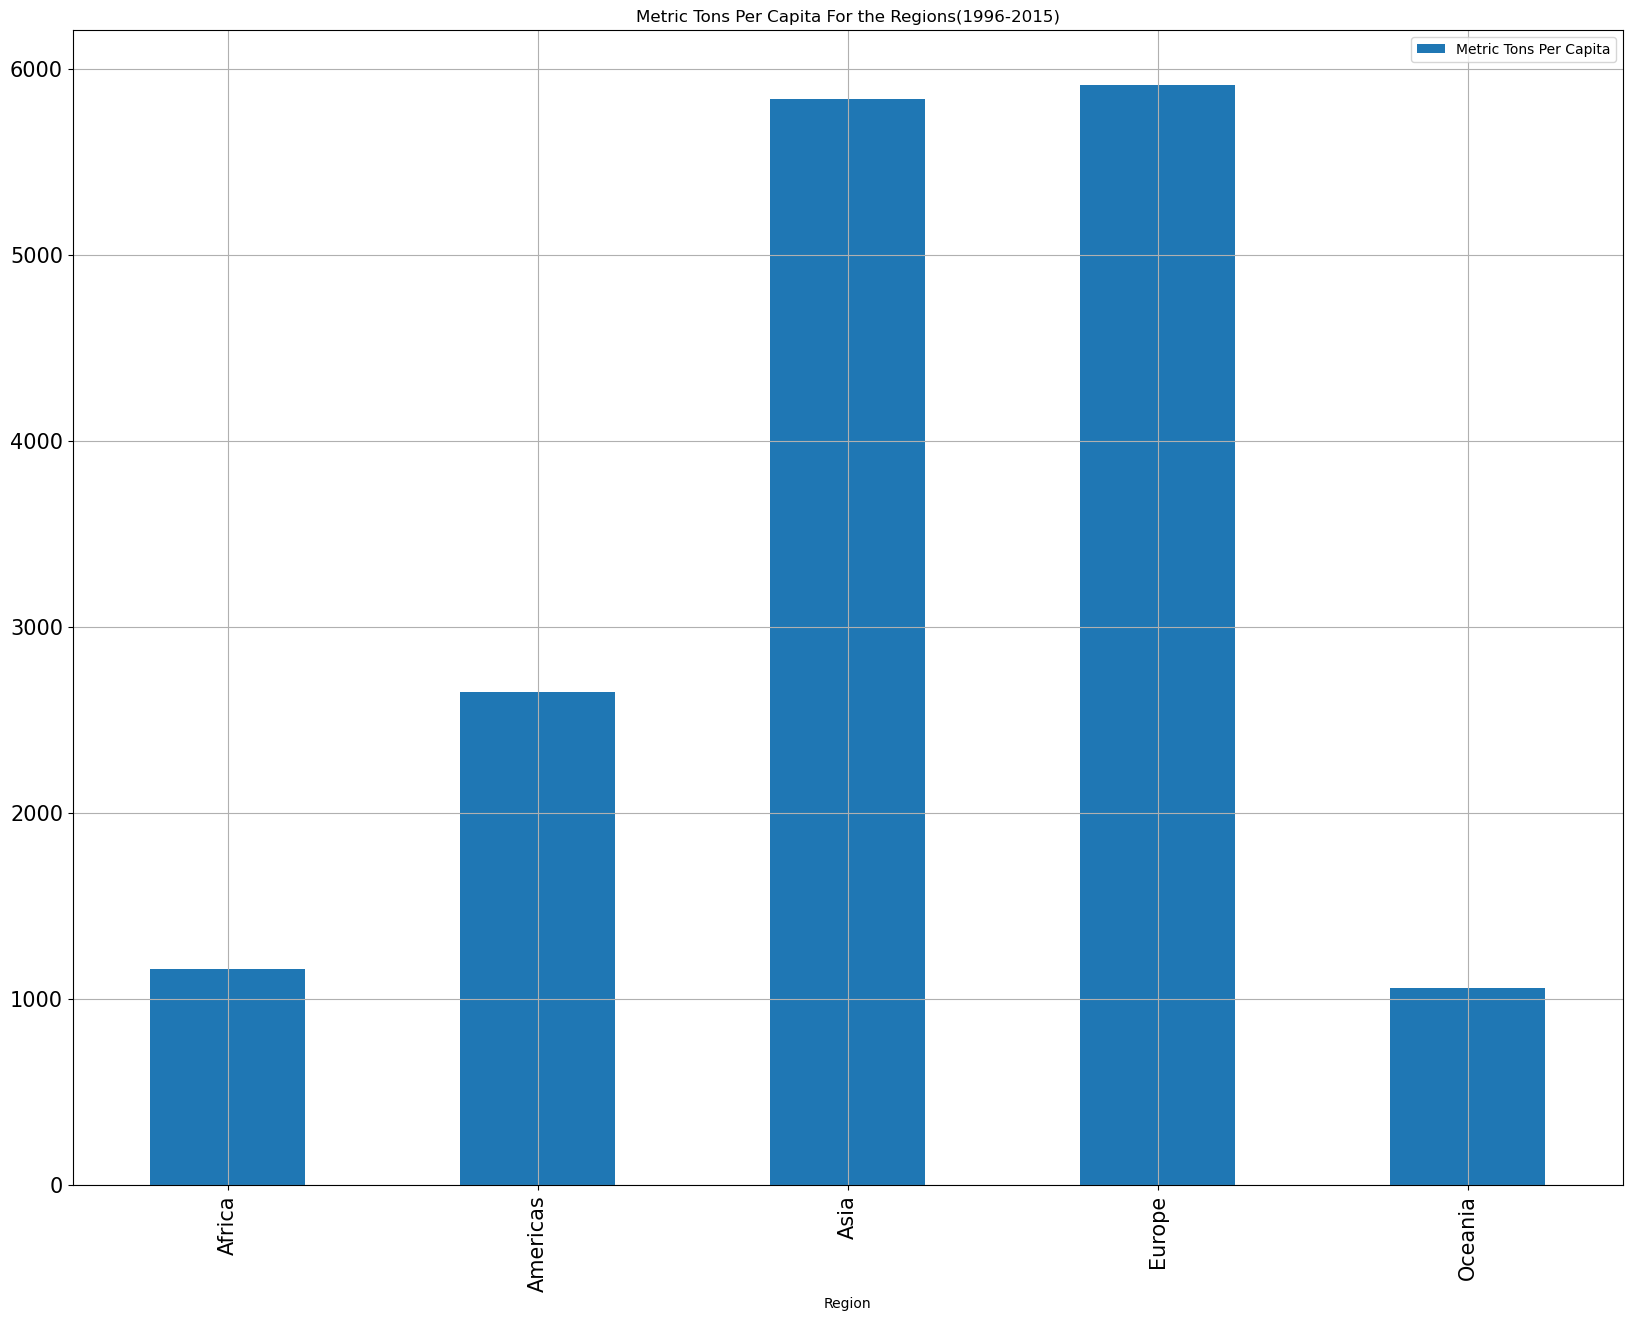

In [14]:
df['year'] = [df['Date'].astype('str').iloc[i].split('-')[-1] for i in range(len(df))]
df['year'] = df['year'].astype('int')
df2=df[df['year']>=1996]
df2a = df2[df['year']<=2015]
df3= df2a.groupby(by='Region').sum()
df3.plot(kind='bar',y='Metric Tons Per Capita',figsize=(20,15),rot=90,
         title='Metric Tons Per Capita For the Regions(1996-2015)',fontsize=15,grid=True)

Between 1996 and 2015, Europe had a higher emission per capita from carbon dioxide compared to Asia while Oceania region had the least.

<Axes: title={'center': 'Metric Tons Per Capita For the Regions(1996-2019)'}, xlabel='Region'>

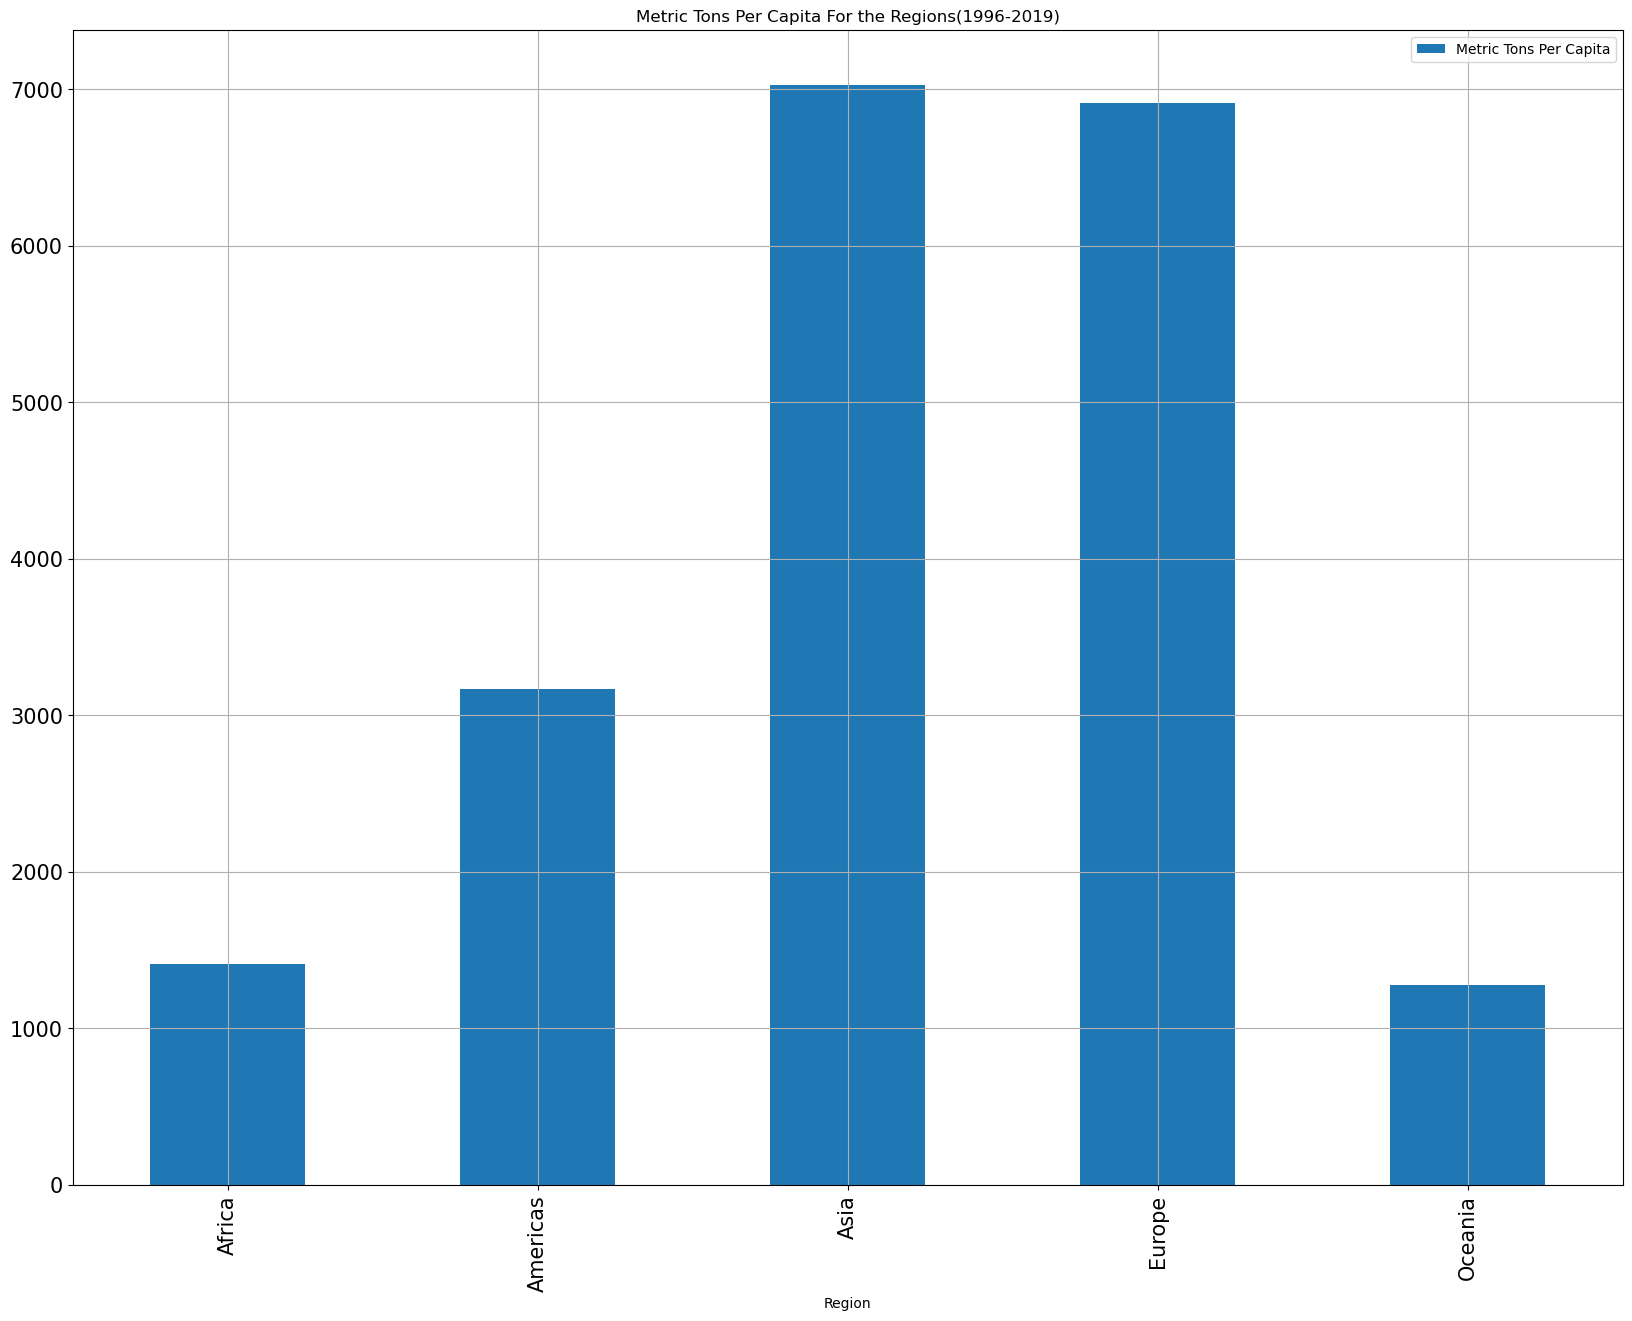

In [15]:
df2=df[df['year']>=1996]
df2 = df2[df2['year']<=2019]
df3= df2.groupby(by='Region').sum()
df3.plot(kind='bar',y='Metric Tons Per Capita',figsize=(20,15),rot=90,
         title='Metric Tons Per Capita For the Regions(1996-2019)',fontsize=15,grid=True)

Asia has the highest contribution of metric Tonnes per capita of Carbon dioxide with the years between 1996 and 2019. The rate of increase in Asia is higher than that of Europe for the duration between 2015 and 2019.
Considering the number of countries in the dataset for the various Regions in descending order are Africa, Asia, Europe,America and Oceania.

#### Kilotonne Analysis

<Axes: title={'center': 'Kilotons of Co2 For the Regions'}, xlabel='Region'>

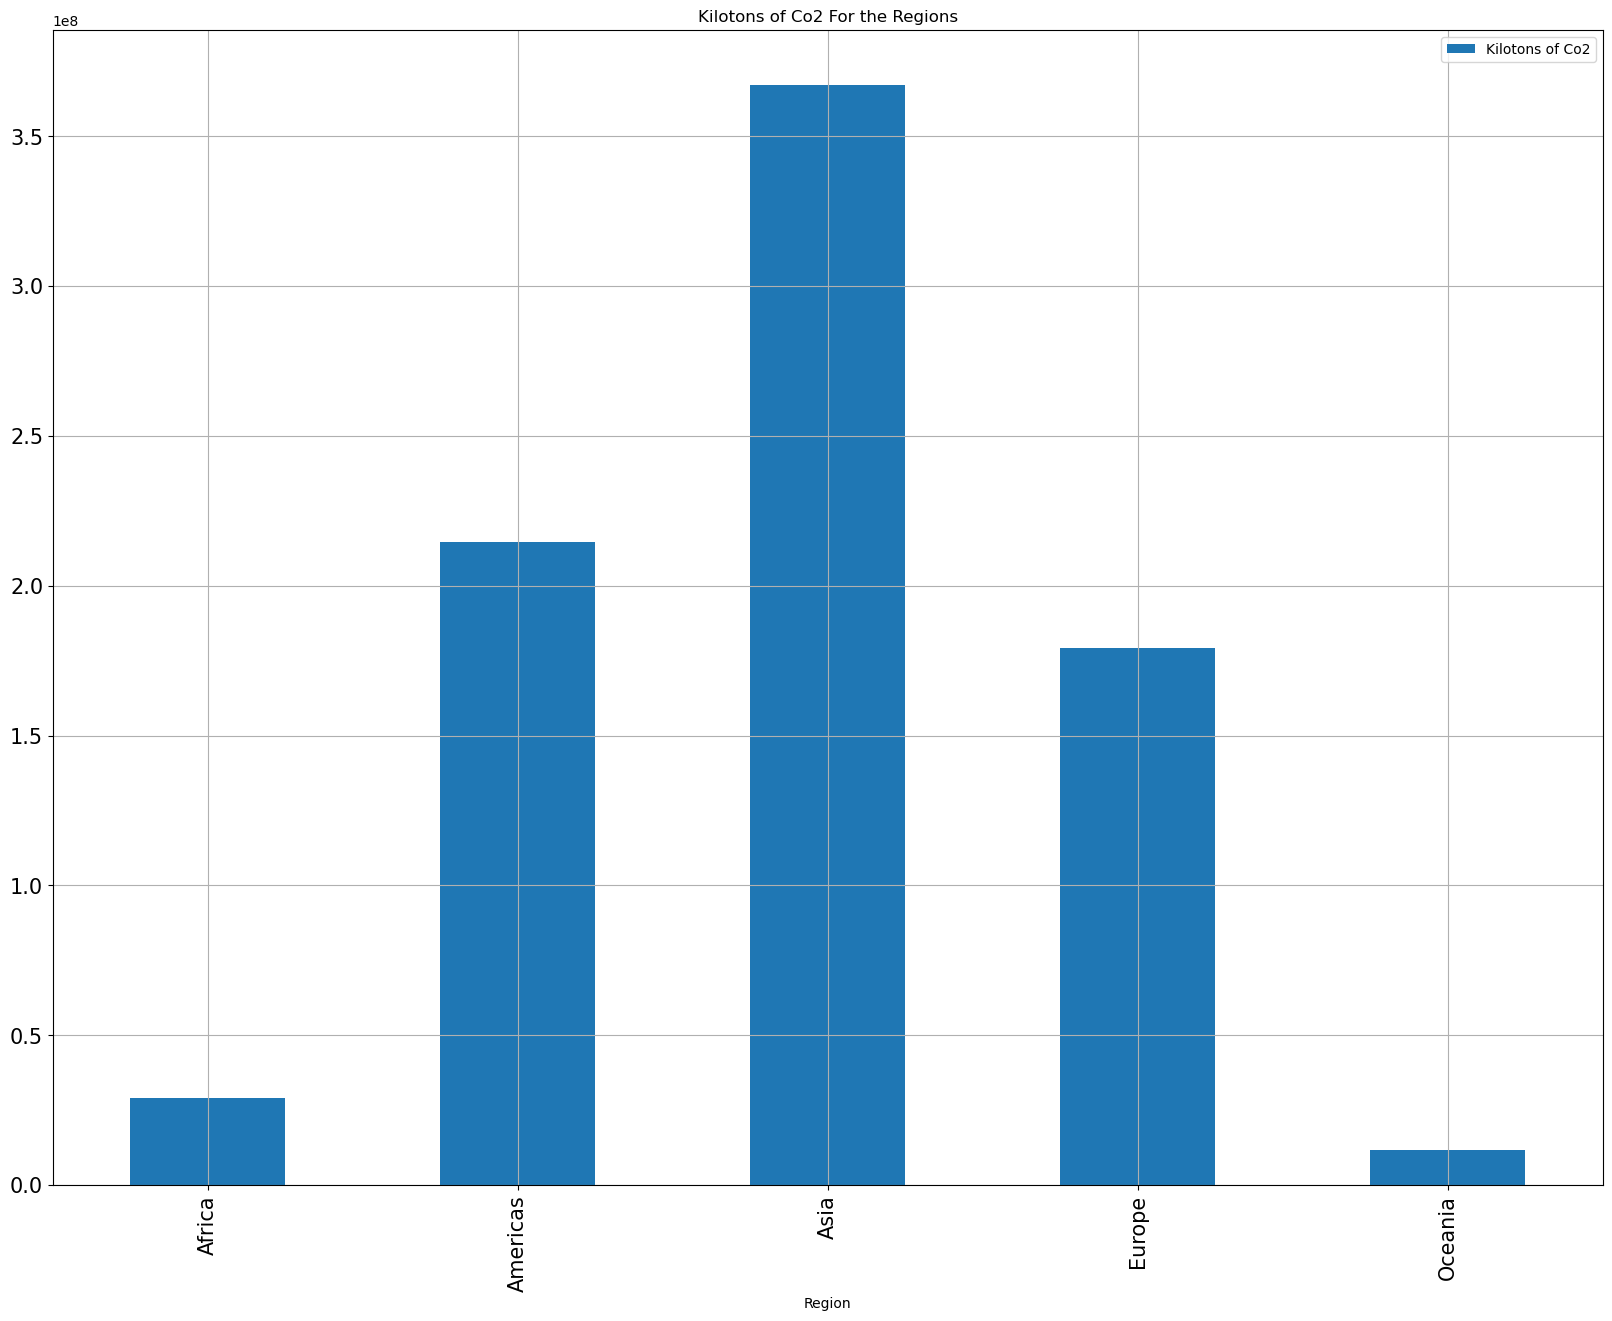

In [16]:
df3= df.groupby(by='Region').sum()
df3.plot(kind='bar',y='Kilotons of Co2',figsize=(20,15),rot=90,
         title='Kilotons of Co2 For the Regions',fontsize=15,grid=True)

<Axes: title={'center': 'Kilotons of Co2 For the Regions(1996-2015)'}, xlabel='Region'>

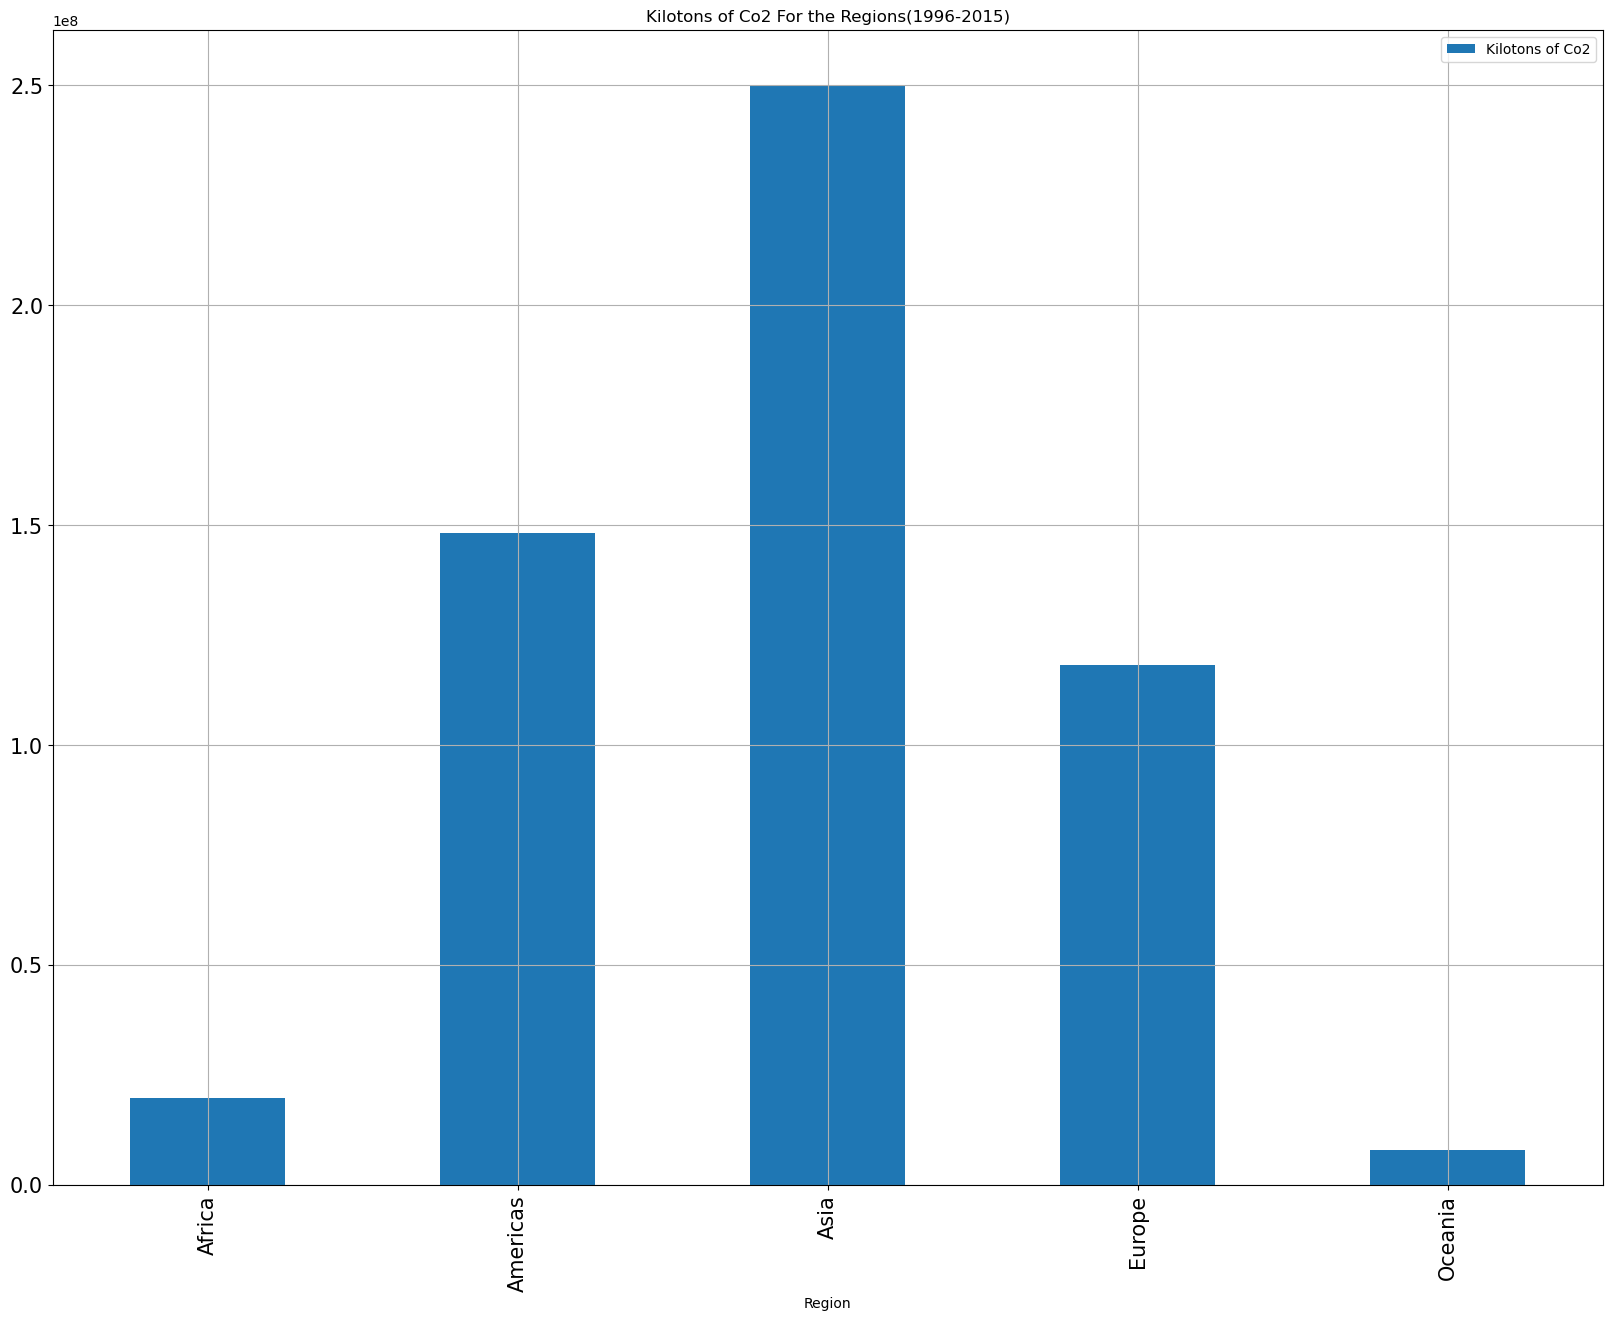

In [17]:
df2=df[df['year']>=1996]
df2 = df2[df2['year']<=2015]
df3= df2.groupby(by='Region').sum()
df3.plot(kind='bar',y='Kilotons of Co2',figsize=(20,15),rot=90,
         title='Kilotons of Co2 For the Regions(1996-2015)',fontsize=15,grid=True)

Considering the kilotons of Carbon dioxide emitted in the same duration, Asia has the highest contribution. America has the second highest contribution but 3rd in per capita contribution; this can be attributed to the high population in the states/countries in the Americas region.
Oceania still stands as the least contributor of carbon dioxide, Its contribution in the metric tonnes per capita is almost equal to the contribution of Africa due to its low population density conpared to Arican region.

<Axes: title={'center': 'Kilotons of Co2 For the Regions(1996-2019)'}, xlabel='Region'>

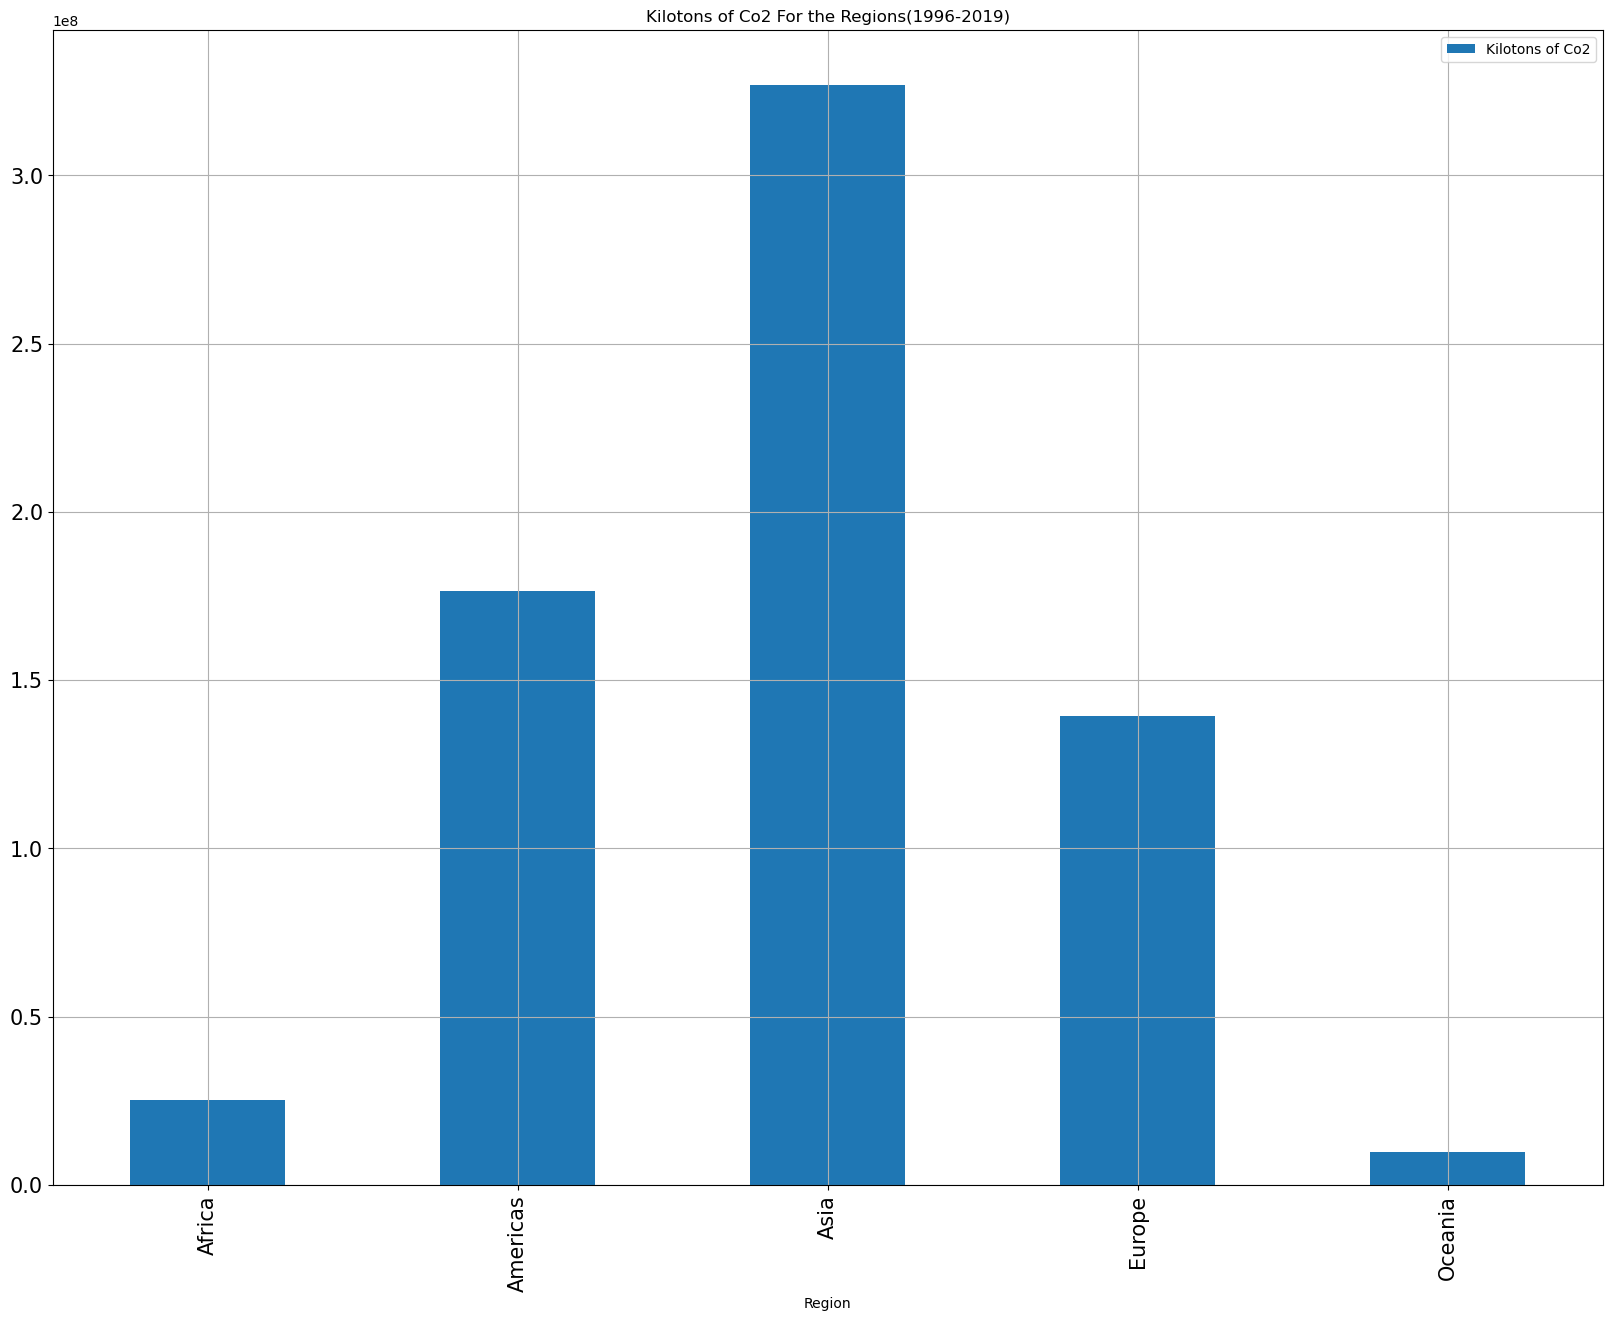

In [18]:
df2=df[df['year']>=1996]
df2 = df2[df2['year']<=2019]
df3= df2.groupby(by='Region').sum()
df3.plot(kind='bar',y='Kilotons of Co2',figsize=(20,15),rot=90,
         title='Kilotons of Co2 For the Regions(1996-2019)',fontsize=15,grid=True)

## Regional Analysis

### Africa

<Axes: title={'center': 'Kilotons of Co2 For the Country'}, xlabel='Country'>

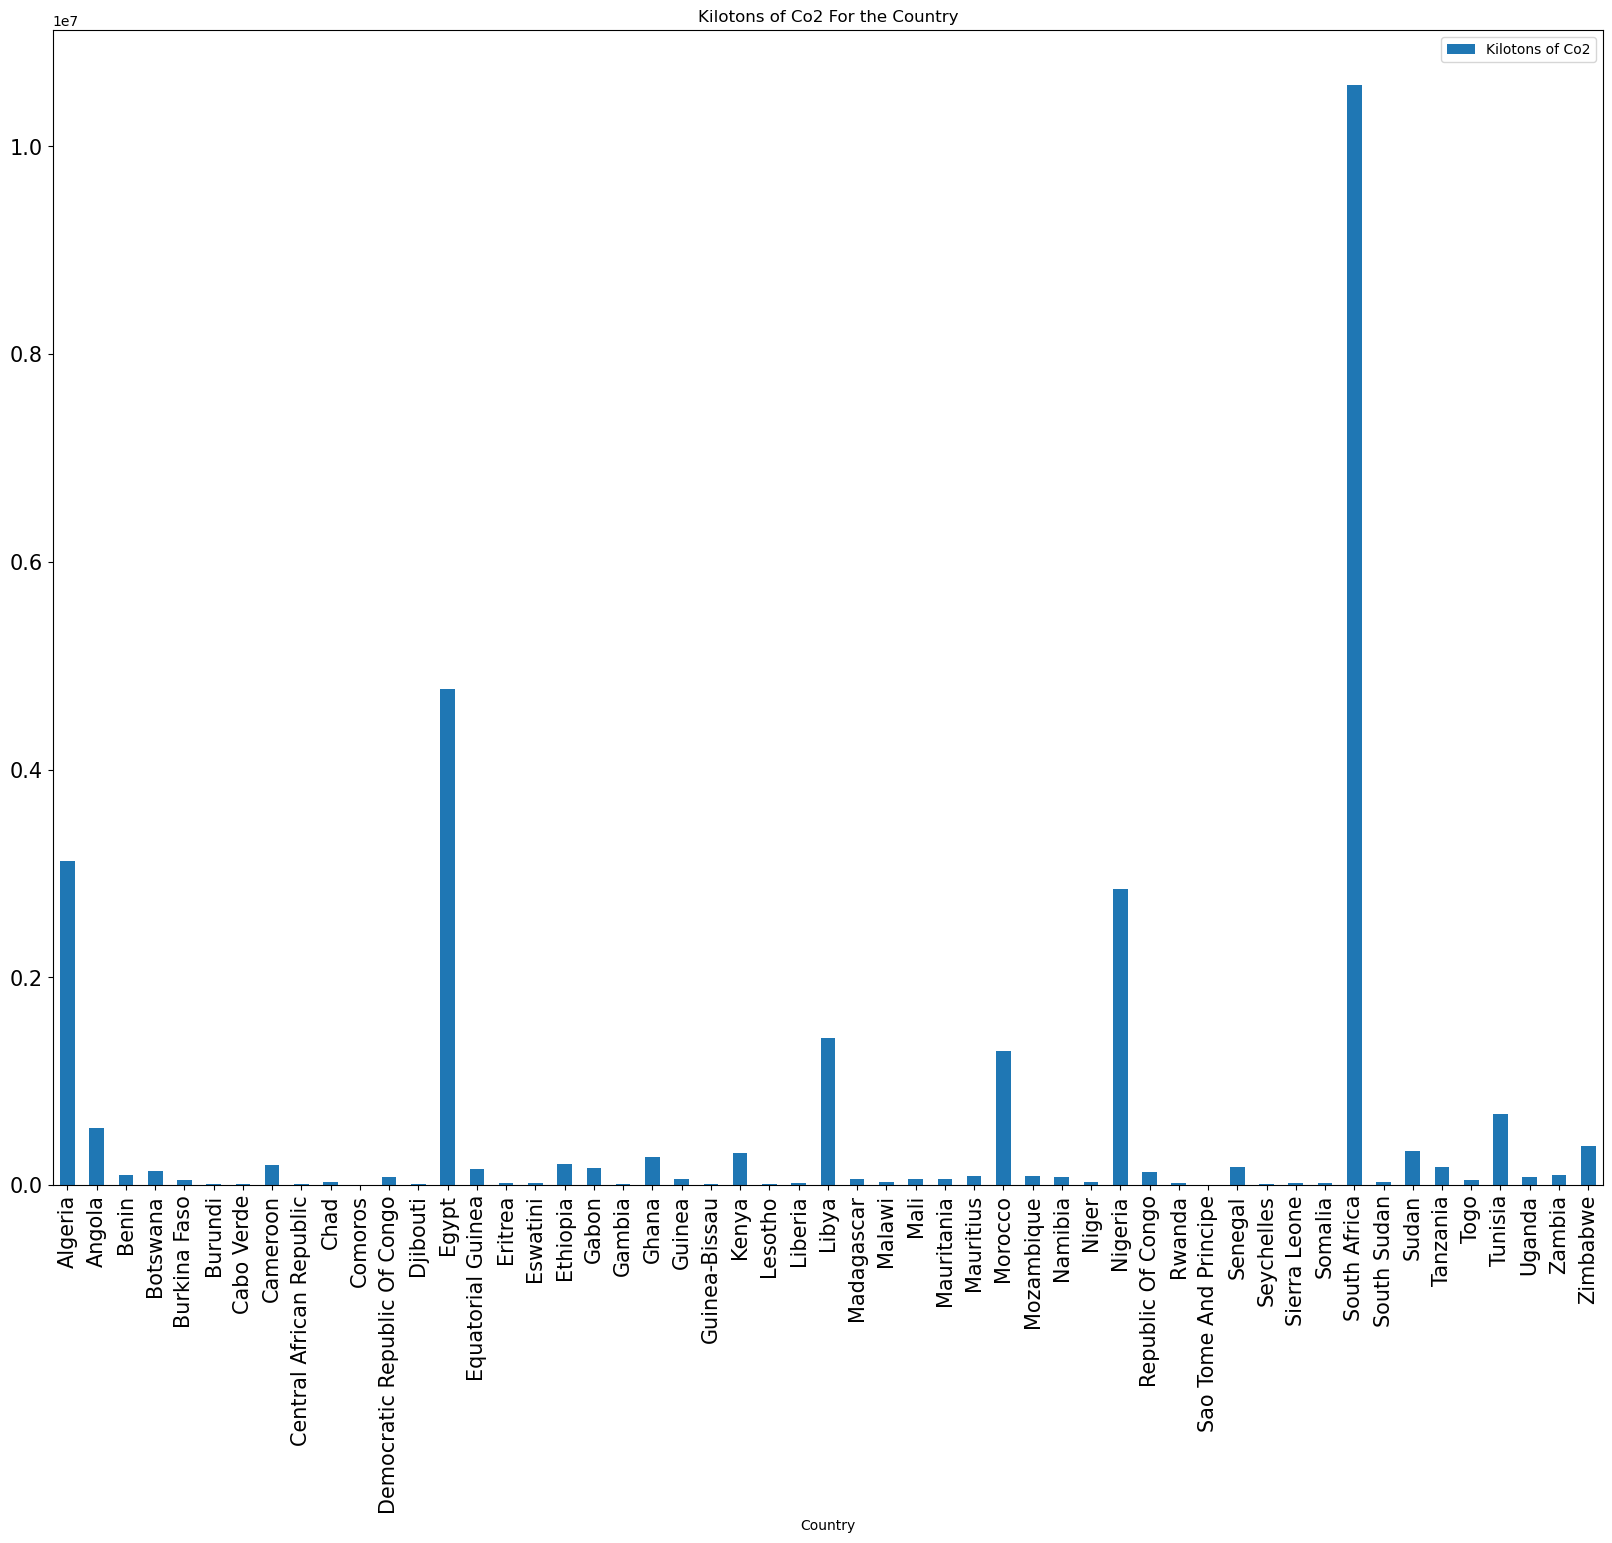

In [19]:
df2=df[df['Region']=='Africa']
df3= df2.groupby(by='Country').sum()
df3.plot(kind='bar',y='Kilotons of Co2',figsize=(20,15),rot=90,
         title='Kilotons of Co2 For the Country',fontsize=15)

In Africa, countries that stand out in the amounts of carbon dioxide emmited to the atmosphere include South Africa, Egypt, Algeria, Nigeria, Libya and Morocco.
Further Analysis to obtain the major economic activities for the stated countries yielded the following results:

*South Africa* : With the main economic activities being Service provision (finance, real estate, business services) contributing about 77% of the GDP, Mining and Manufacturing contributing about 22% while the rest is from Agriculture; In 2019, South Africa was the world's largest producer of platinum,chromium and manganese and among the top 20 largest producers of gold, titanium, vanadium, iron, phosphate, cobalt and Uranium.

*Egypt* : In the Early 1930s the awakening of the industrial revolution in Egypt led to the establishment of several manufacturing industries during the world war 1. The main economic activities in Egypt revolves around Services(Telecommunication,Tourism) accounting for approximately 57% while agriculture and manufacturing at 28%. The main industries are in textiles, food processing, chemicals, pharmaceuticals, hydrocarbons, construction, and metal manufacturers

*Algeria*: The main economic activity around the duration of 2015, was extraction and exporting of nartural gas.

*Nigeria*: The Country was majorly relying on trade, agriculture, information and communication technology, and real estate, with the country still *heavily* relying on oil revenue; the oil sector itself experienced a contraction during this period due to falling oil prices. 

*Libya*:The primary economic activity in Libya was oil and gas production, with the petroleum sector representing the vast majority of the country's export earnings and significantly contributing to its GDP; essentially, Libya's economy heavily relied on oil revenues, with 95% of the export revenue oming from oil export.

*Morocco*: The main economic activity in Morocco was agriculture, contributing a significant portion of the GDP and employing a large part of the workforce, although it was also focused on developing its phosphate mining industry and tourism sector as key economic pillars. 



<Axes: title={'center': 'Metric Tons Per Capita For the Country'}, xlabel='Country'>

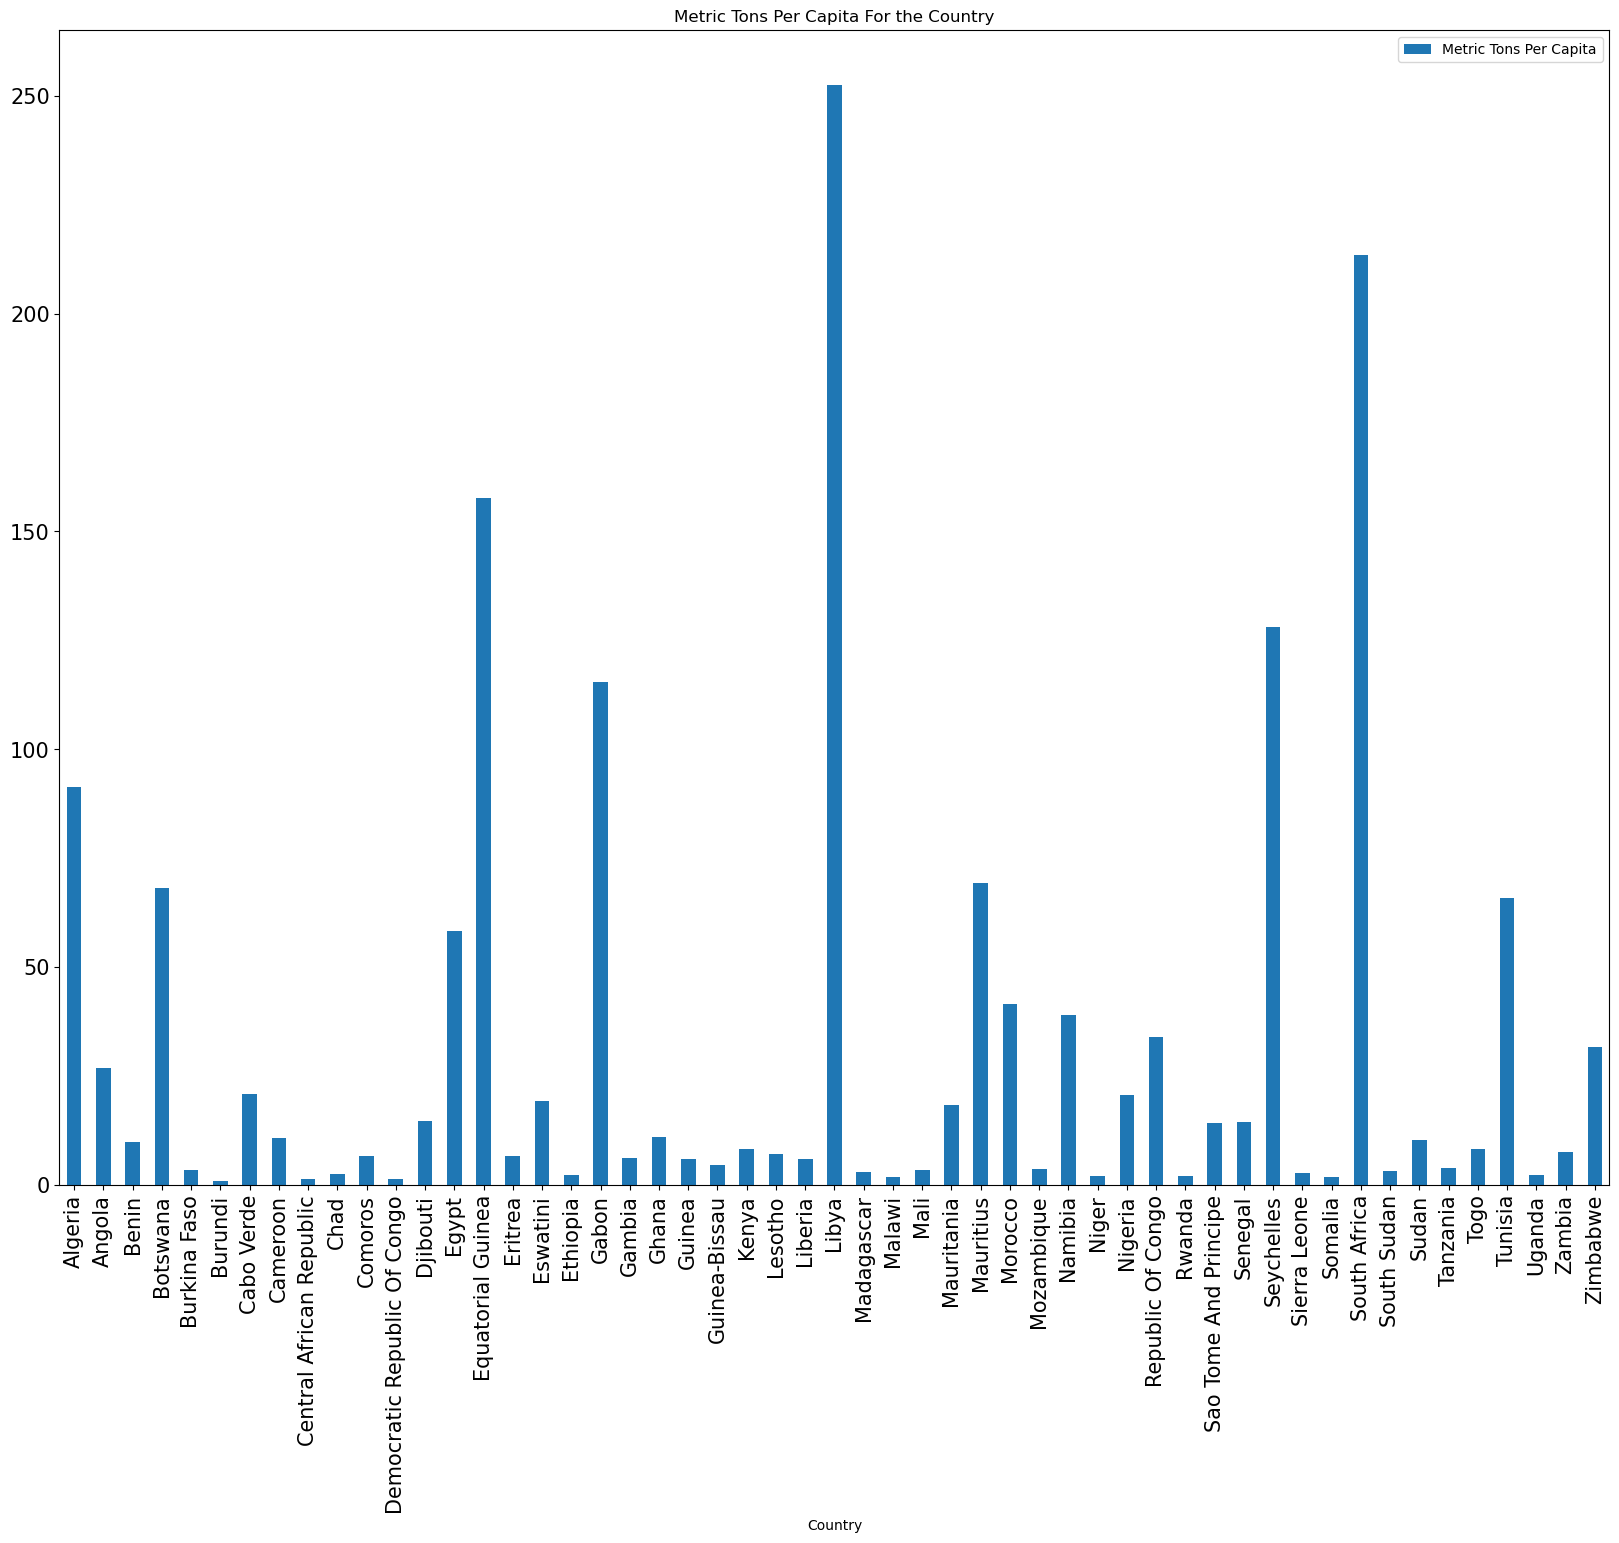

In [20]:
df2=df[df['Region']=='Africa']
df3= df2.groupby(by='Country').sum()
df3.plot(kind='bar',y='Metric Tons Per Capita',figsize=(20,15),rot=90,
         title='Metric Tons Per Capita For the Country',fontsize=15)

In Africa, while considering the Metric Tons Per Capita, Libya, South Africa and Equitorial Guinea tops the list.

*Equitorial Guinea*: The primary economic activity in Equatorial Guinea was oil production, as the country heavily relies on its oil reserves for the majority of its GDP and government revenue, with the oil sector contributing significantly to the economy

All this countries rely on extraction procedures of minerals and oil from the earths crust, However Equitorial Guinea appears on the list due to its low population density compared to other nations.

Of interest in Equitorial Guinea is that majority of the citizens do not rely on extraction of oil to earn a living.

#### Year on Year Rate

In [21]:
df2.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita,year
60,Algeria,Africa,01-01-2019,171250.00,4.01,2019
61,Algeria,Africa,01-01-2018,165539.99,3.95,2018
62,Algeria,Africa,01-01-2017,158340.00,3.85,2017
63,Algeria,Africa,01-01-2015,156270.00,3.95,2015
64,Algeria,Africa,01-01-2016,154910.00,3.84,2016


<Axes: title={'center': 'Kilotons of Co2 vs Year in Africa'}, xlabel='year'>

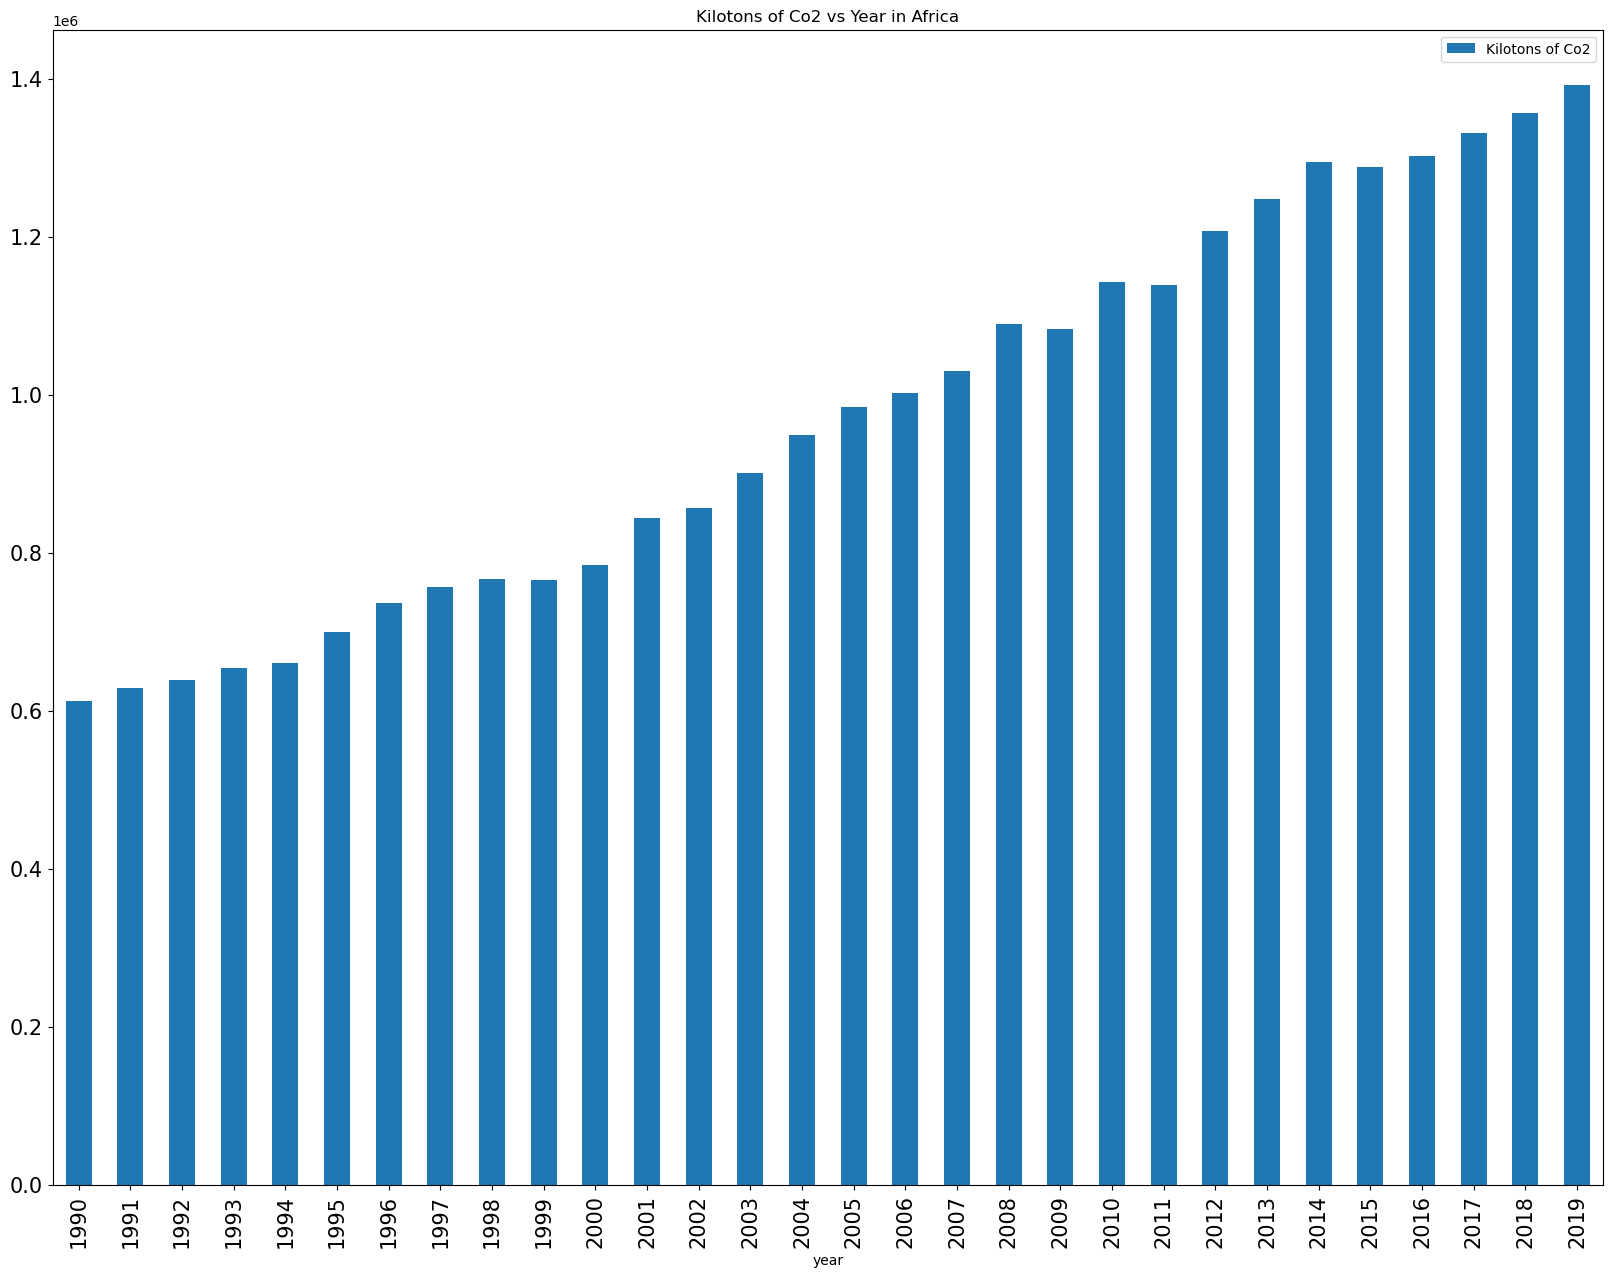

In [22]:
df3a = df2.groupby(by=['year']).sum().reset_index()
df3a.plot(kind='bar',x='year',y='Kilotons of Co2',figsize=(20,15),
          rot=90,title='Kilotons of Co2 vs Year in Africa',fontsize=15)

 The amount of CO2 emmitted to the atmosphere over the years is on the rise in Africa. This continuous rise ove the years is evident with the increase in population sizes and this poses a risk in the coming generation as more and more fuel and carbon emmitters are used.

### Asia

<Axes: title={'center': 'Kilotons of Co2 For the Country'}, xlabel='Country'>

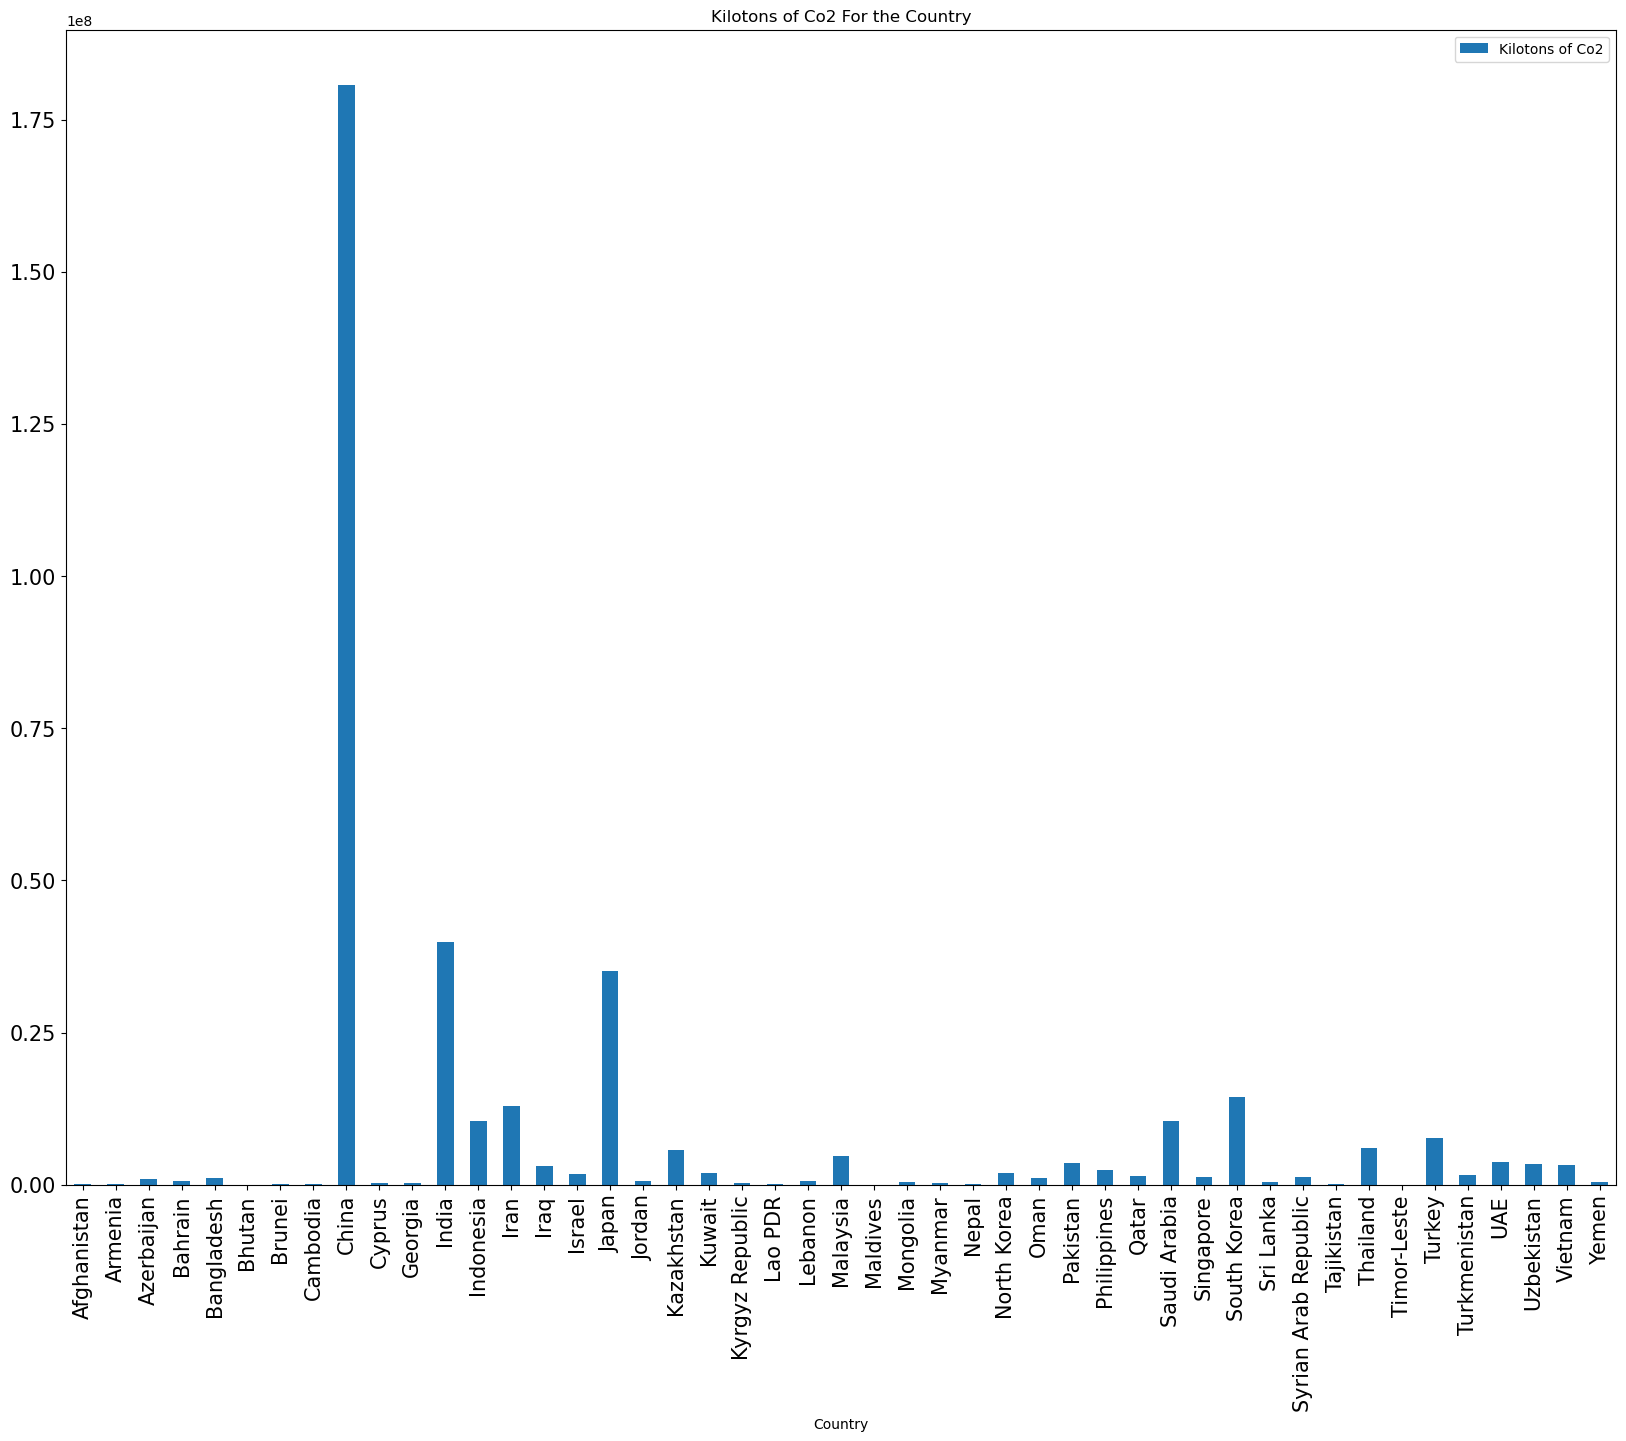

In [23]:
df4=df[df['Region']=='Asia']
df5= df4.groupby(by='Country').sum()
df5.plot(kind='bar',y='Kilotons of Co2',figsize=(20,15),rot=90,
         title='Kilotons of Co2 For the Country',fontsize=15)

All Countries in Asia, China stands out in the Asian Continent, followed by India and Japan. This are countries considered for manufacturing processes with Janpan having the Toyota brand India had the second highest volume of Carbon dioxide in Asia due to the high machining and industrialisation in the area.
The main activities of the People of China was: ..............
The main activities of the people of India was: ..............
The main activities of the people of Japan was: ..............

<Axes: title={'center': 'Metric Tons Per Capita of Co2 For the Country'}, xlabel='Country'>

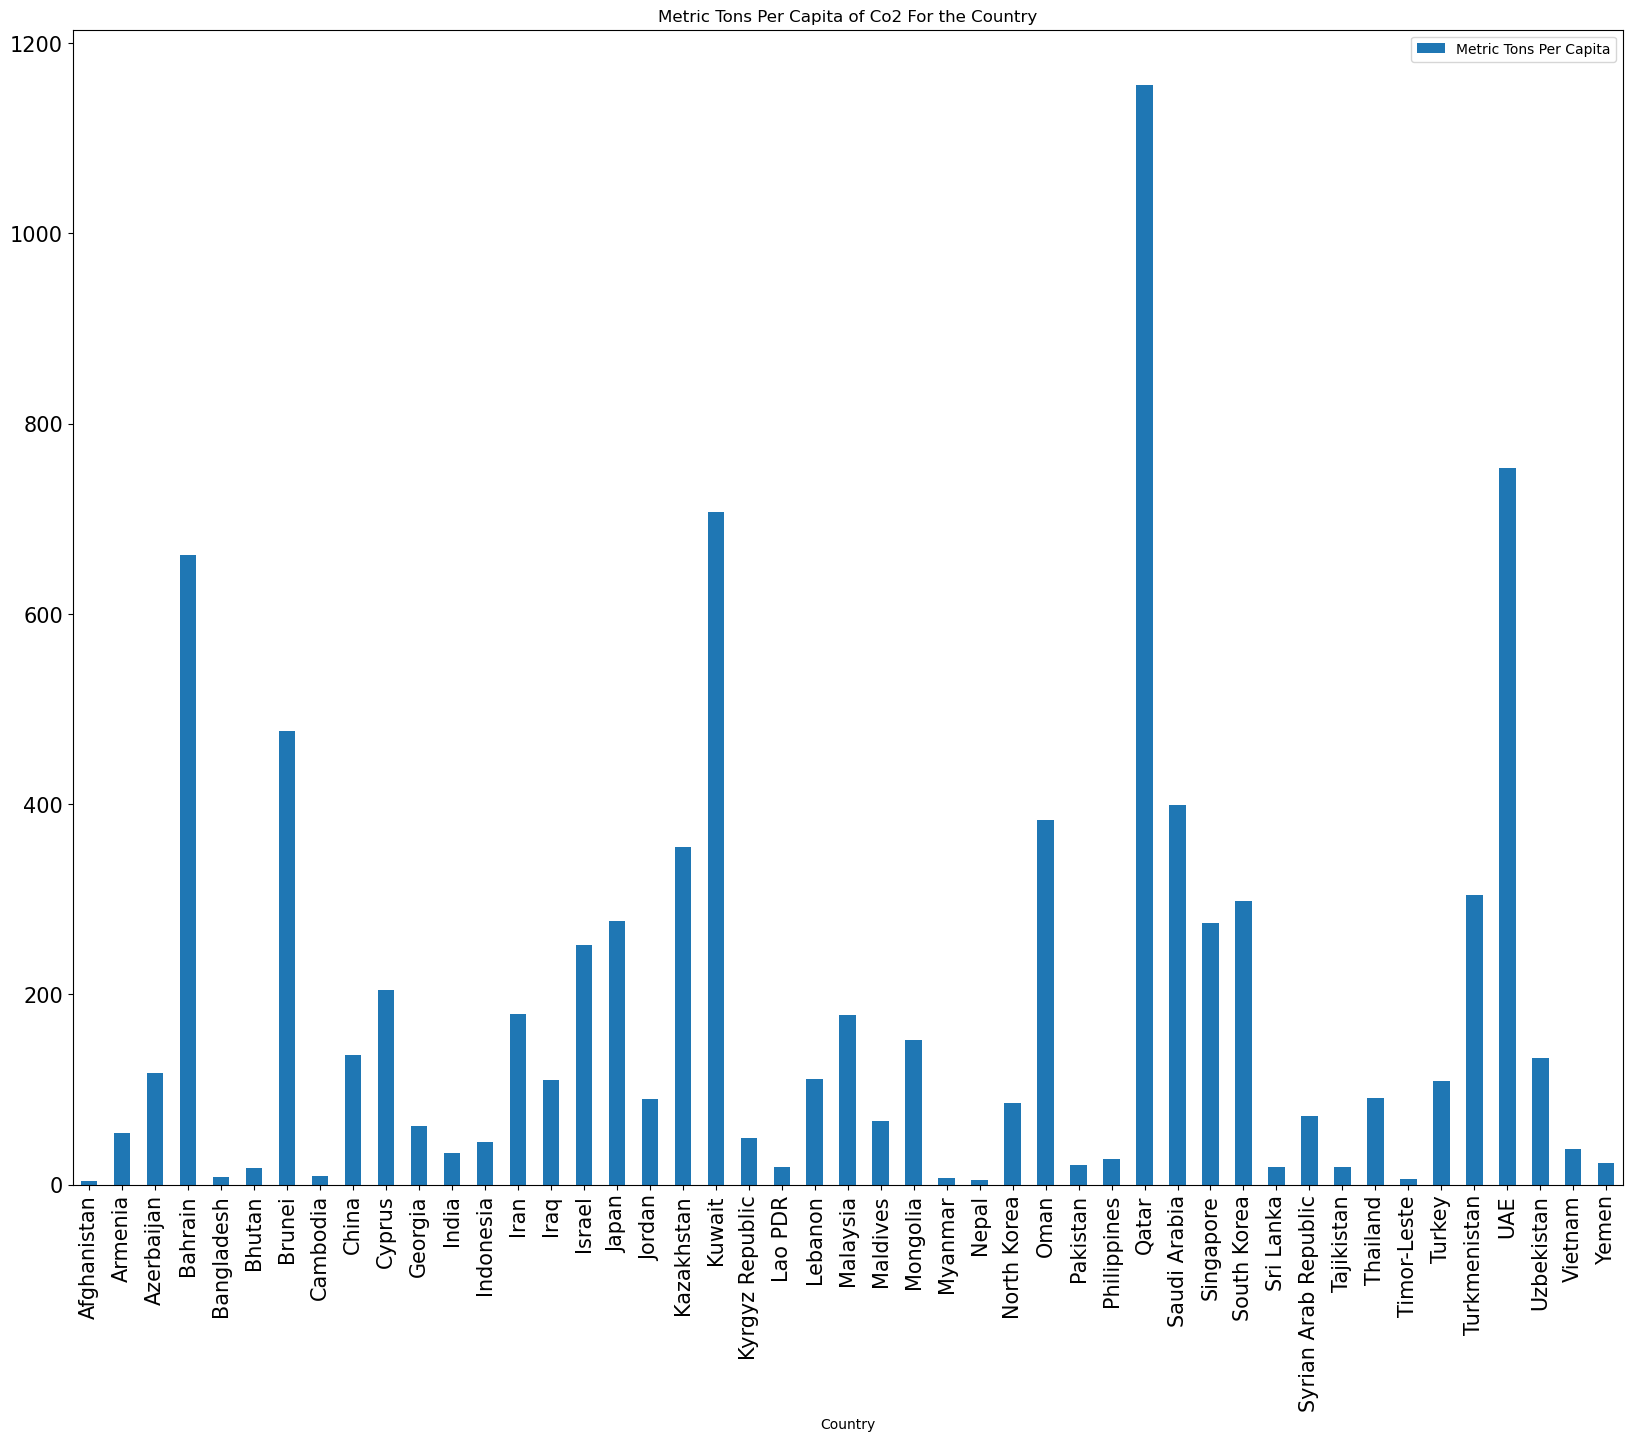

In [24]:
df4=df[df['Region']=='Asia']
df5= df4.groupby(by='Country').sum()
df5.plot(kind='bar',y='Metric Tons Per Capita',figsize=(20,15),rot=90,
         title='Metric Tons Per Capita of Co2 For the Country',fontsize=15)

Qatar had the highest metric tonnes per capita from the datasedt in the region, despite having a low volumes of Carbon dioxide emitted, the per capita indicates that the population 

<Axes: title={'center': 'Kilotons of Co2 vs Year in Asia'}, xlabel='year'>

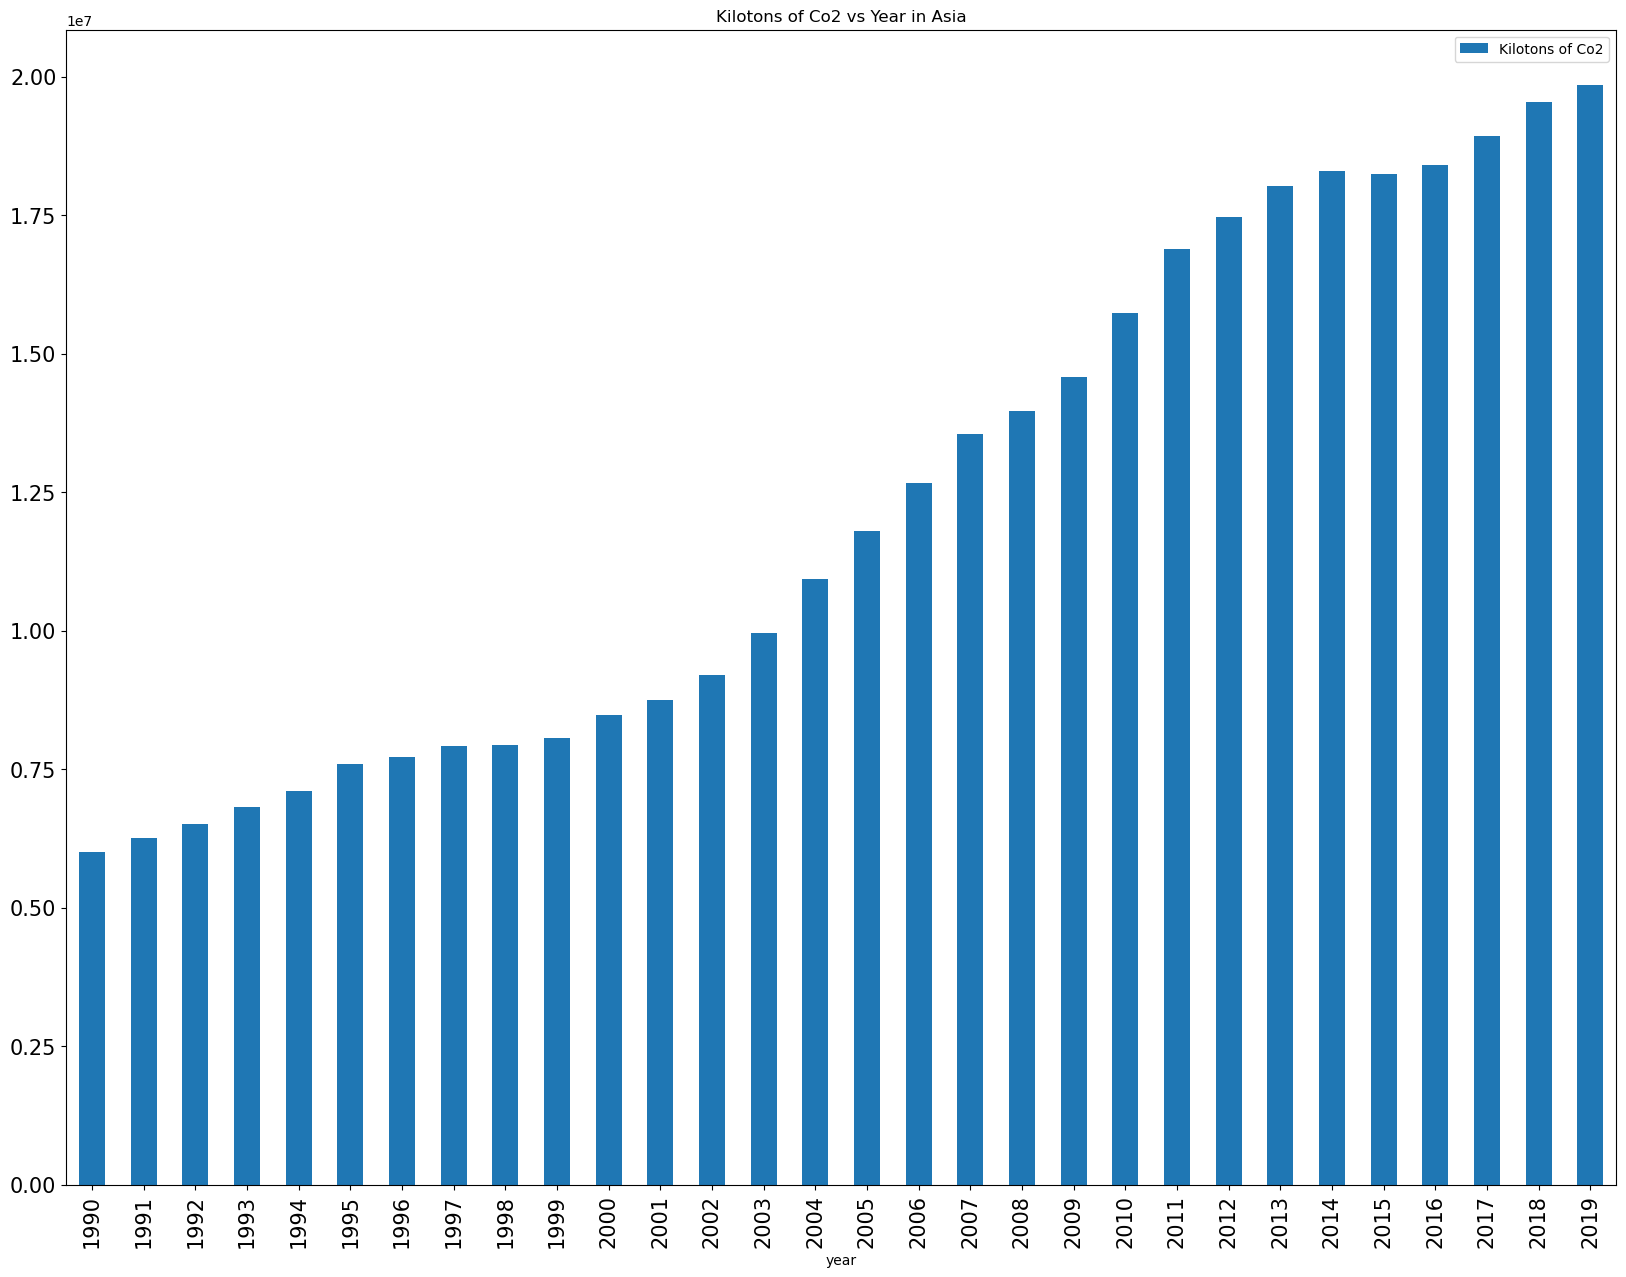

In [25]:
df5a = df4.groupby(by=['year']).sum().reset_index()
df5a.plot(kind='bar',x='year',y='Kilotons of Co2',figsize=(20,15),
          rot=90,title='Kilotons of Co2 vs Year in Asia',fontsize=15)

China has experienced an increase in the volume of Carbon dioxide emmitted to the atmosphere. In 2015,2016 there was a stagnation of the amount of emmissions probably indicating a stagnation of the industrialisation proccesses.

### Americas

<Axes: title={'center': 'Kilotons of Co2 For the Country'}, xlabel='Country'>

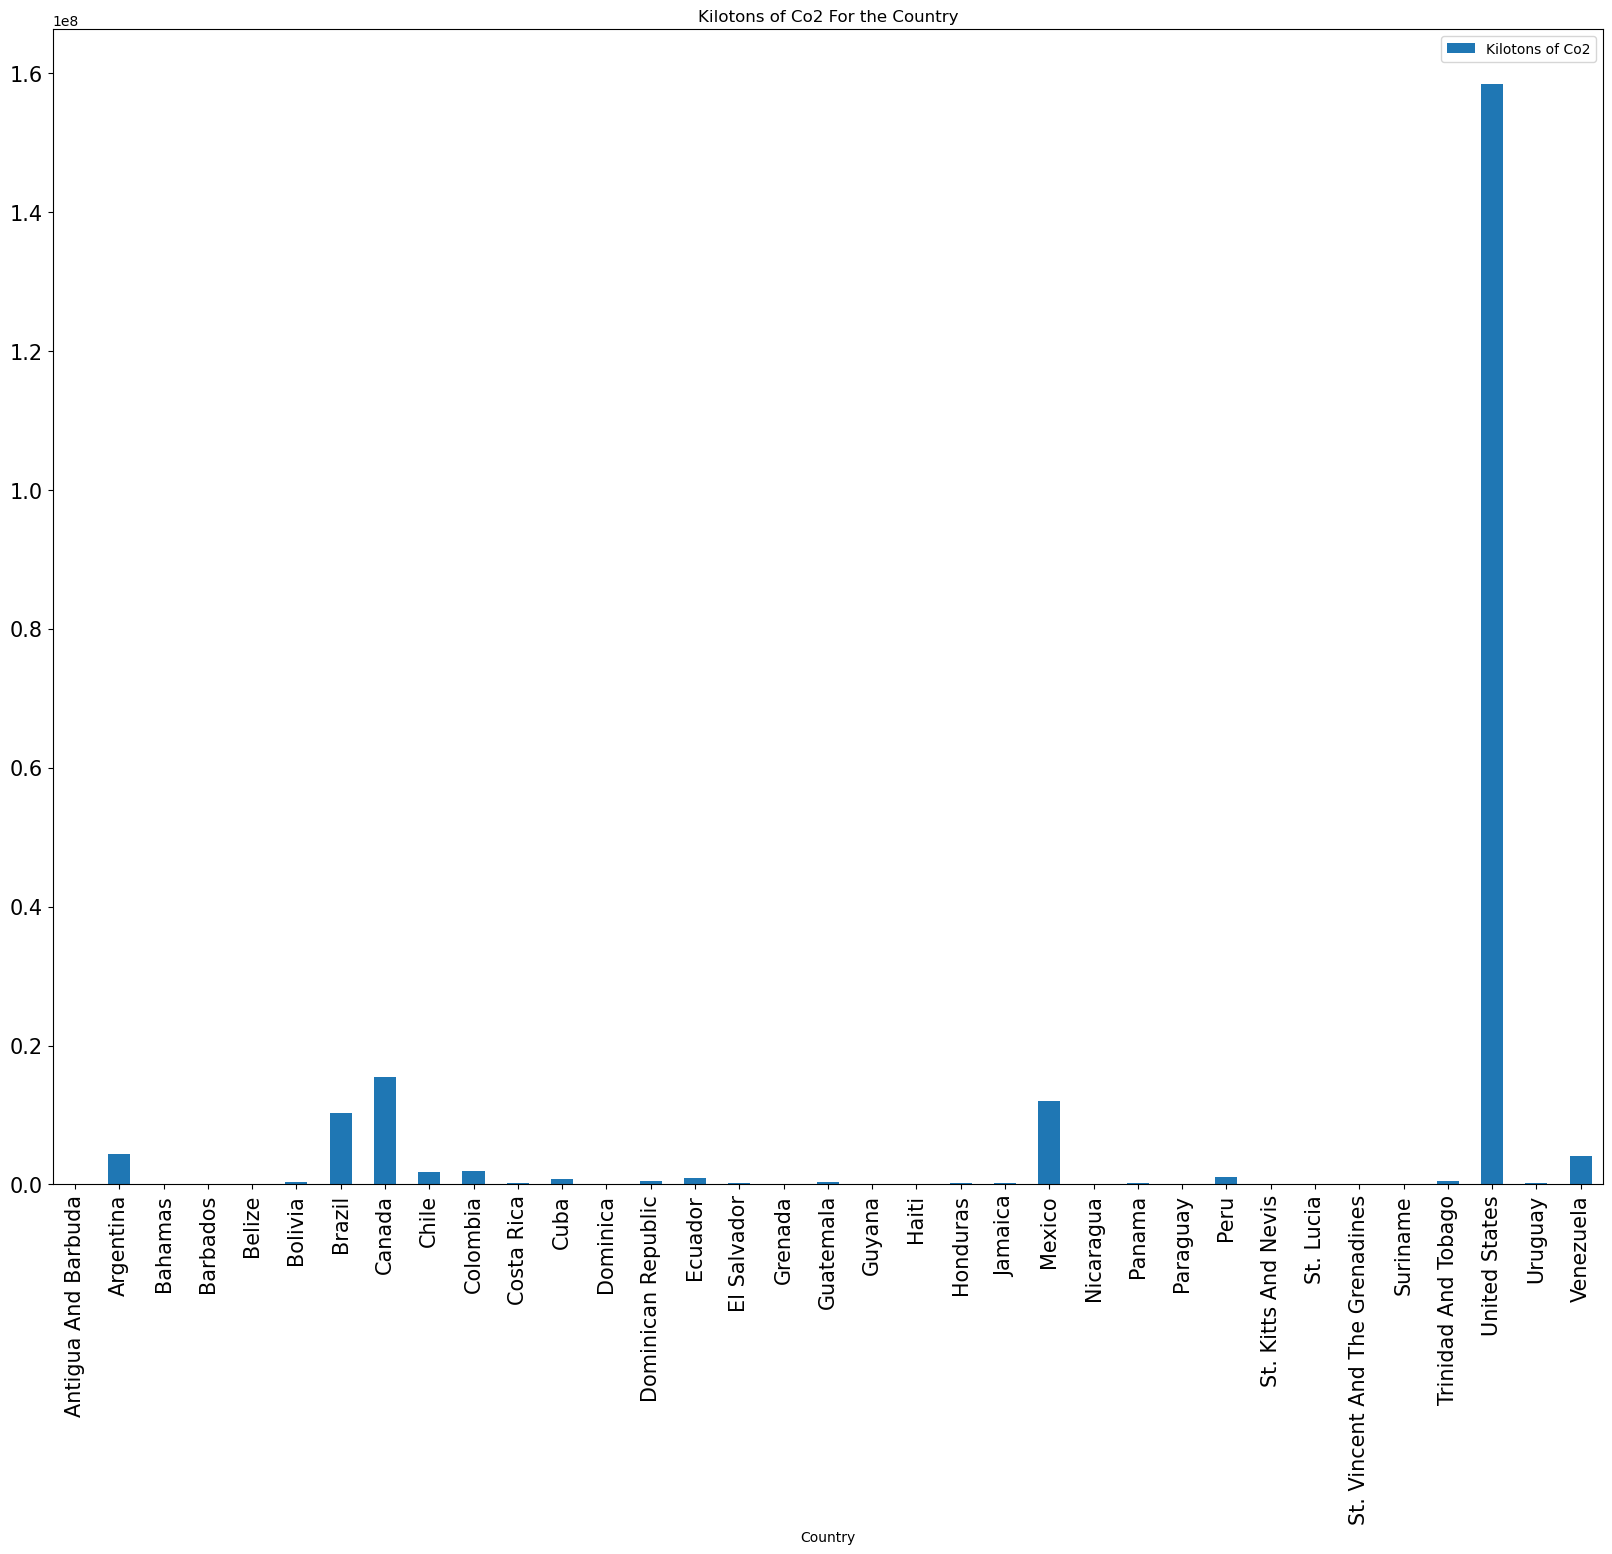

In [26]:
df4a=df[df['Region']=='Americas']
df5a= df4a.groupby(by='Country').sum()
df5a.plot(kind='bar',y='Kilotons of Co2',figsize=(20,15),rot=90,
         title='Kilotons of Co2 For the Country',fontsize=15)

<Axes: title={'center': 'Metric Tons Per Capita of Co2 For the Country'}, xlabel='Country'>

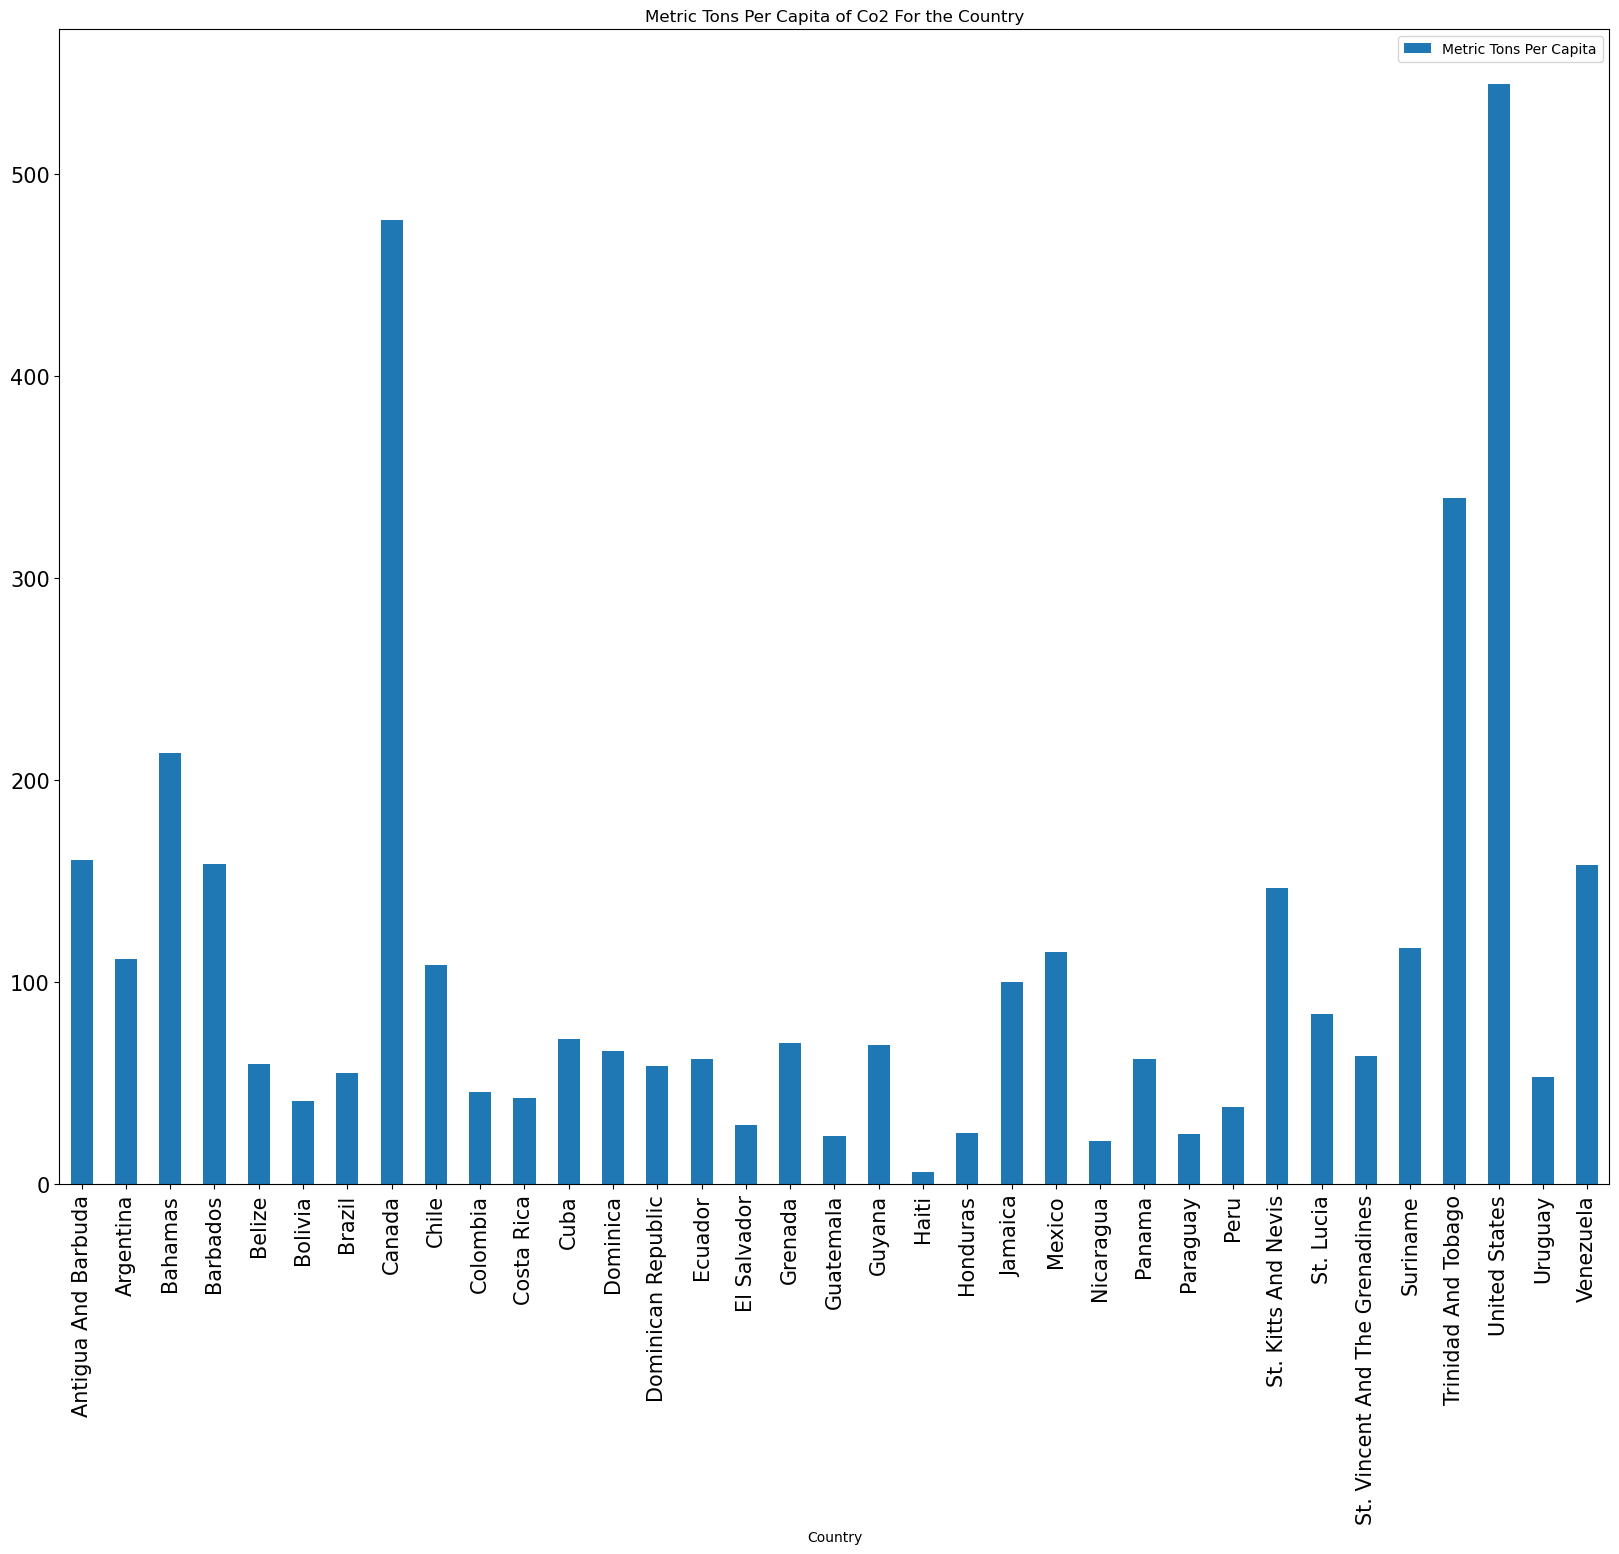

In [27]:
df4a=df[df['Region']=='Americas']
df5a= df4a.groupby(by='Country').sum()
df5a.plot(kind='bar',y='Metric Tons Per Capita',figsize=(20,15),rot=90,
         title='Metric Tons Per Capita of Co2 For the Country',fontsize=15)

<Axes: title={'center': 'Kilotons of Co2 vs Year in Americas'}, xlabel='year'>

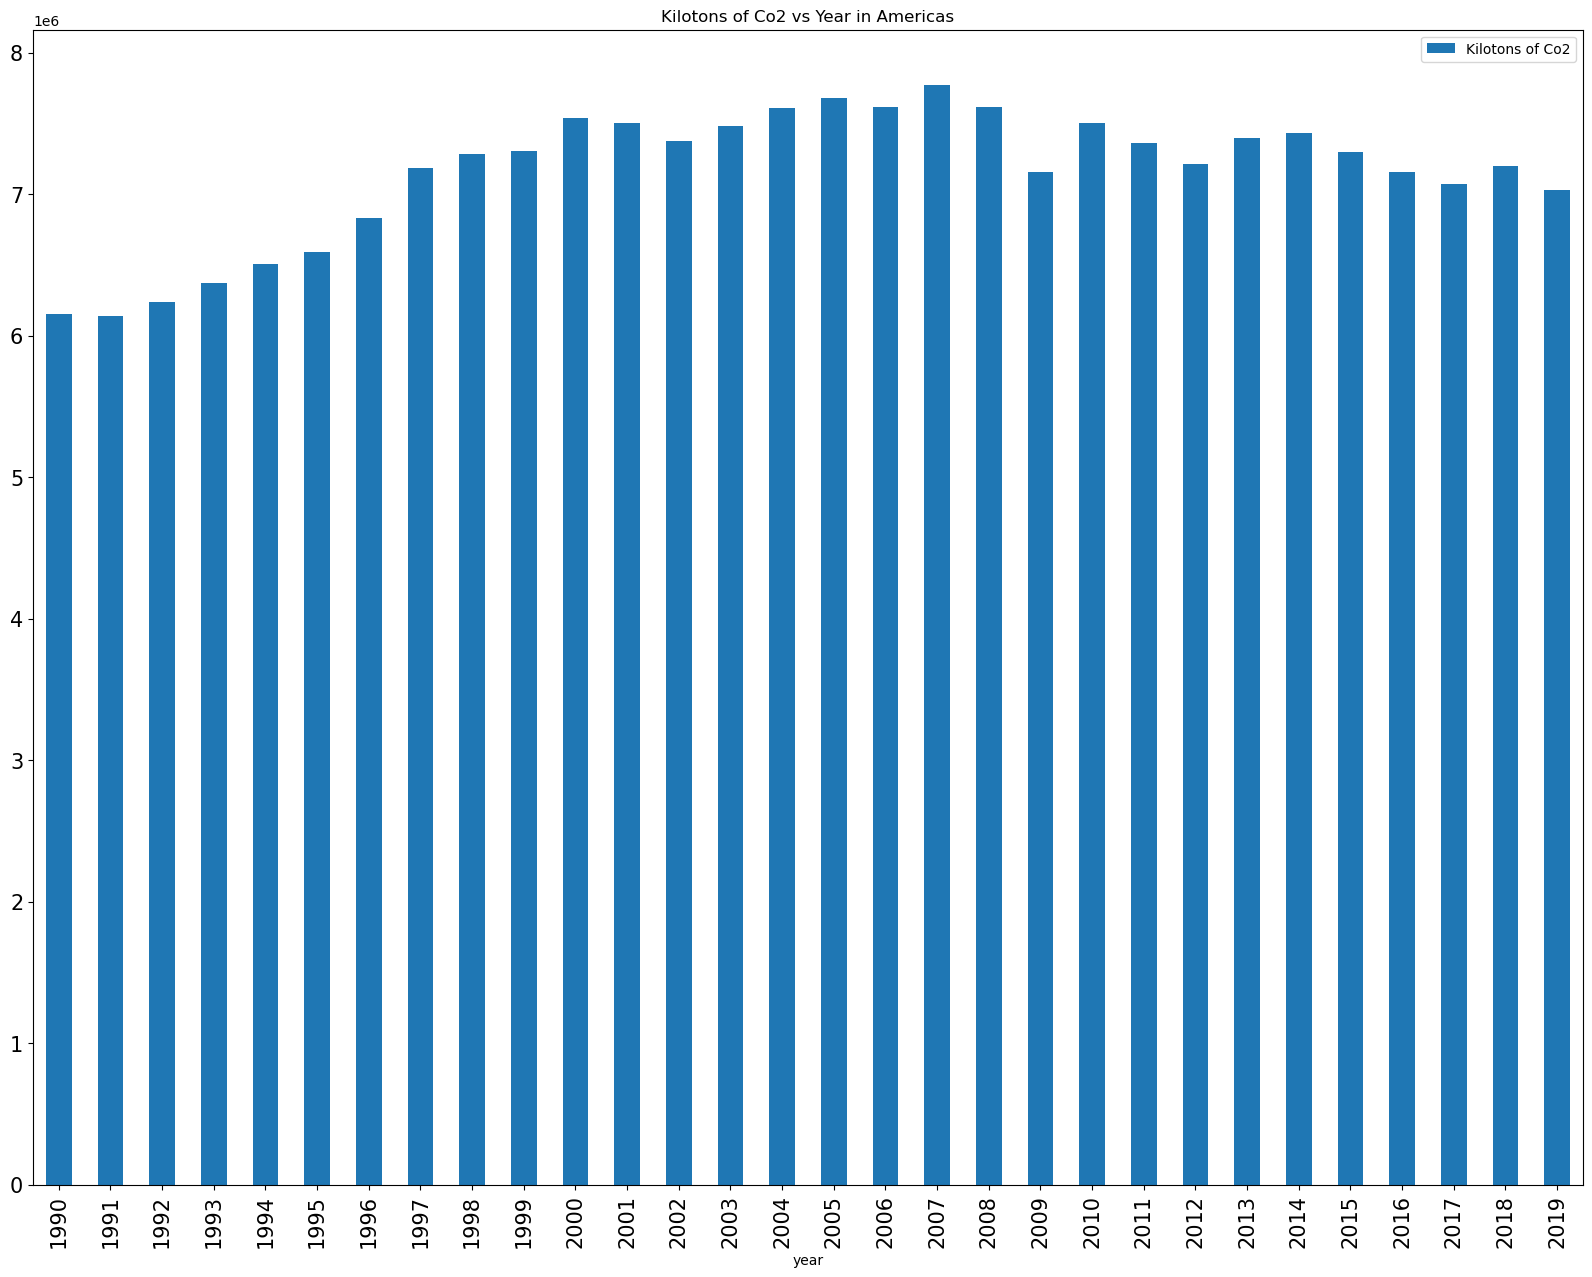

In [28]:
df5b = df4a.groupby(by=['year']).sum().reset_index()
df5b.plot(kind='bar',x='year',y='Kilotons of Co2',figsize=(20,15),
          rot=90,title='Kilotons of Co2 vs Year in Americas',fontsize=15)

### Oceania

<Axes: title={'center': 'Kilotons of Co2 For the Country'}, xlabel='Country'>

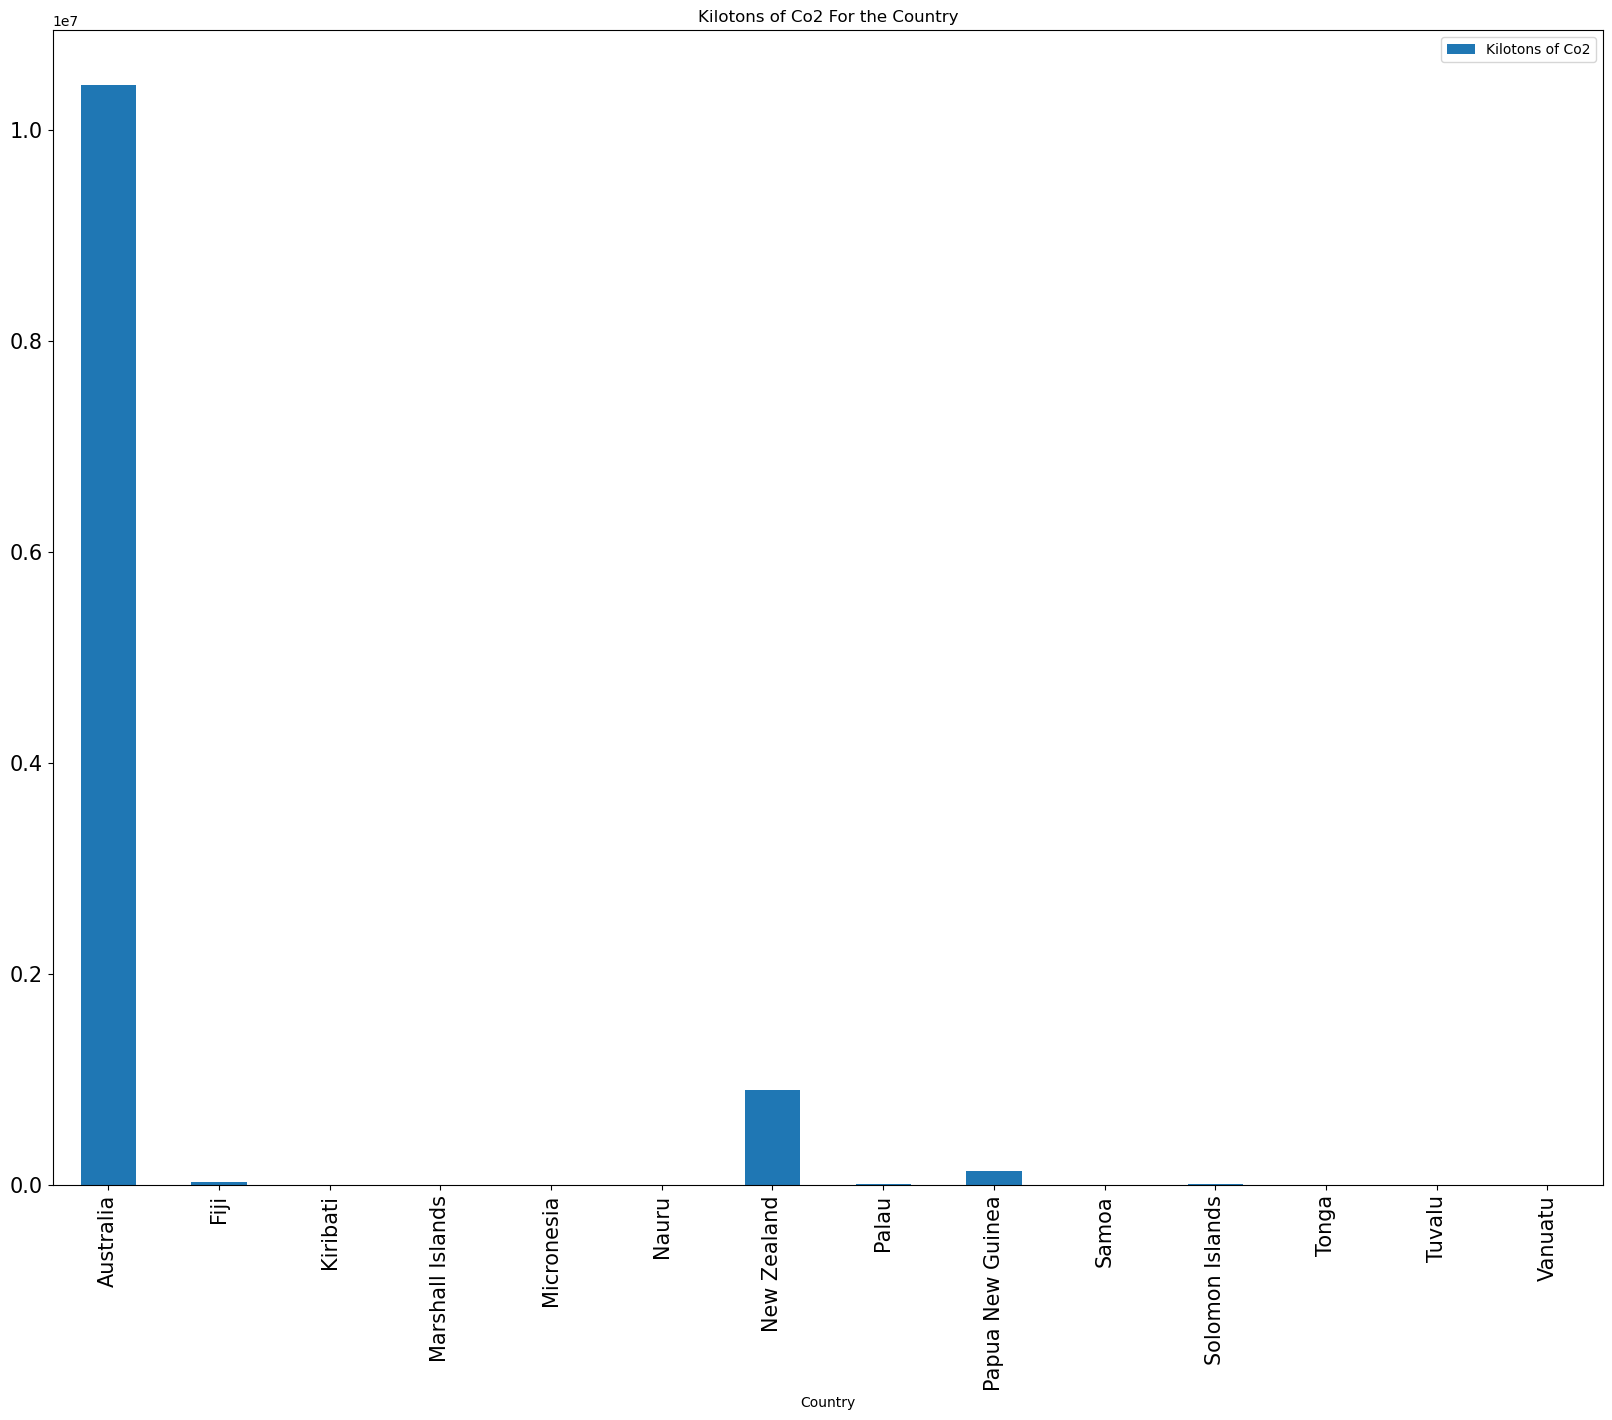

In [29]:
df6=df[df['Region']=='Oceania']
df7= df6.groupby(by='Country').sum()
df7.plot(kind='bar',y='Kilotons of Co2',figsize=(20,15),rot=90,
         title='Kilotons of Co2 For the Country',fontsize=15)

<Axes: title={'center': 'Metric Tons Per Capita of Co2 For the Country'}, xlabel='Country'>

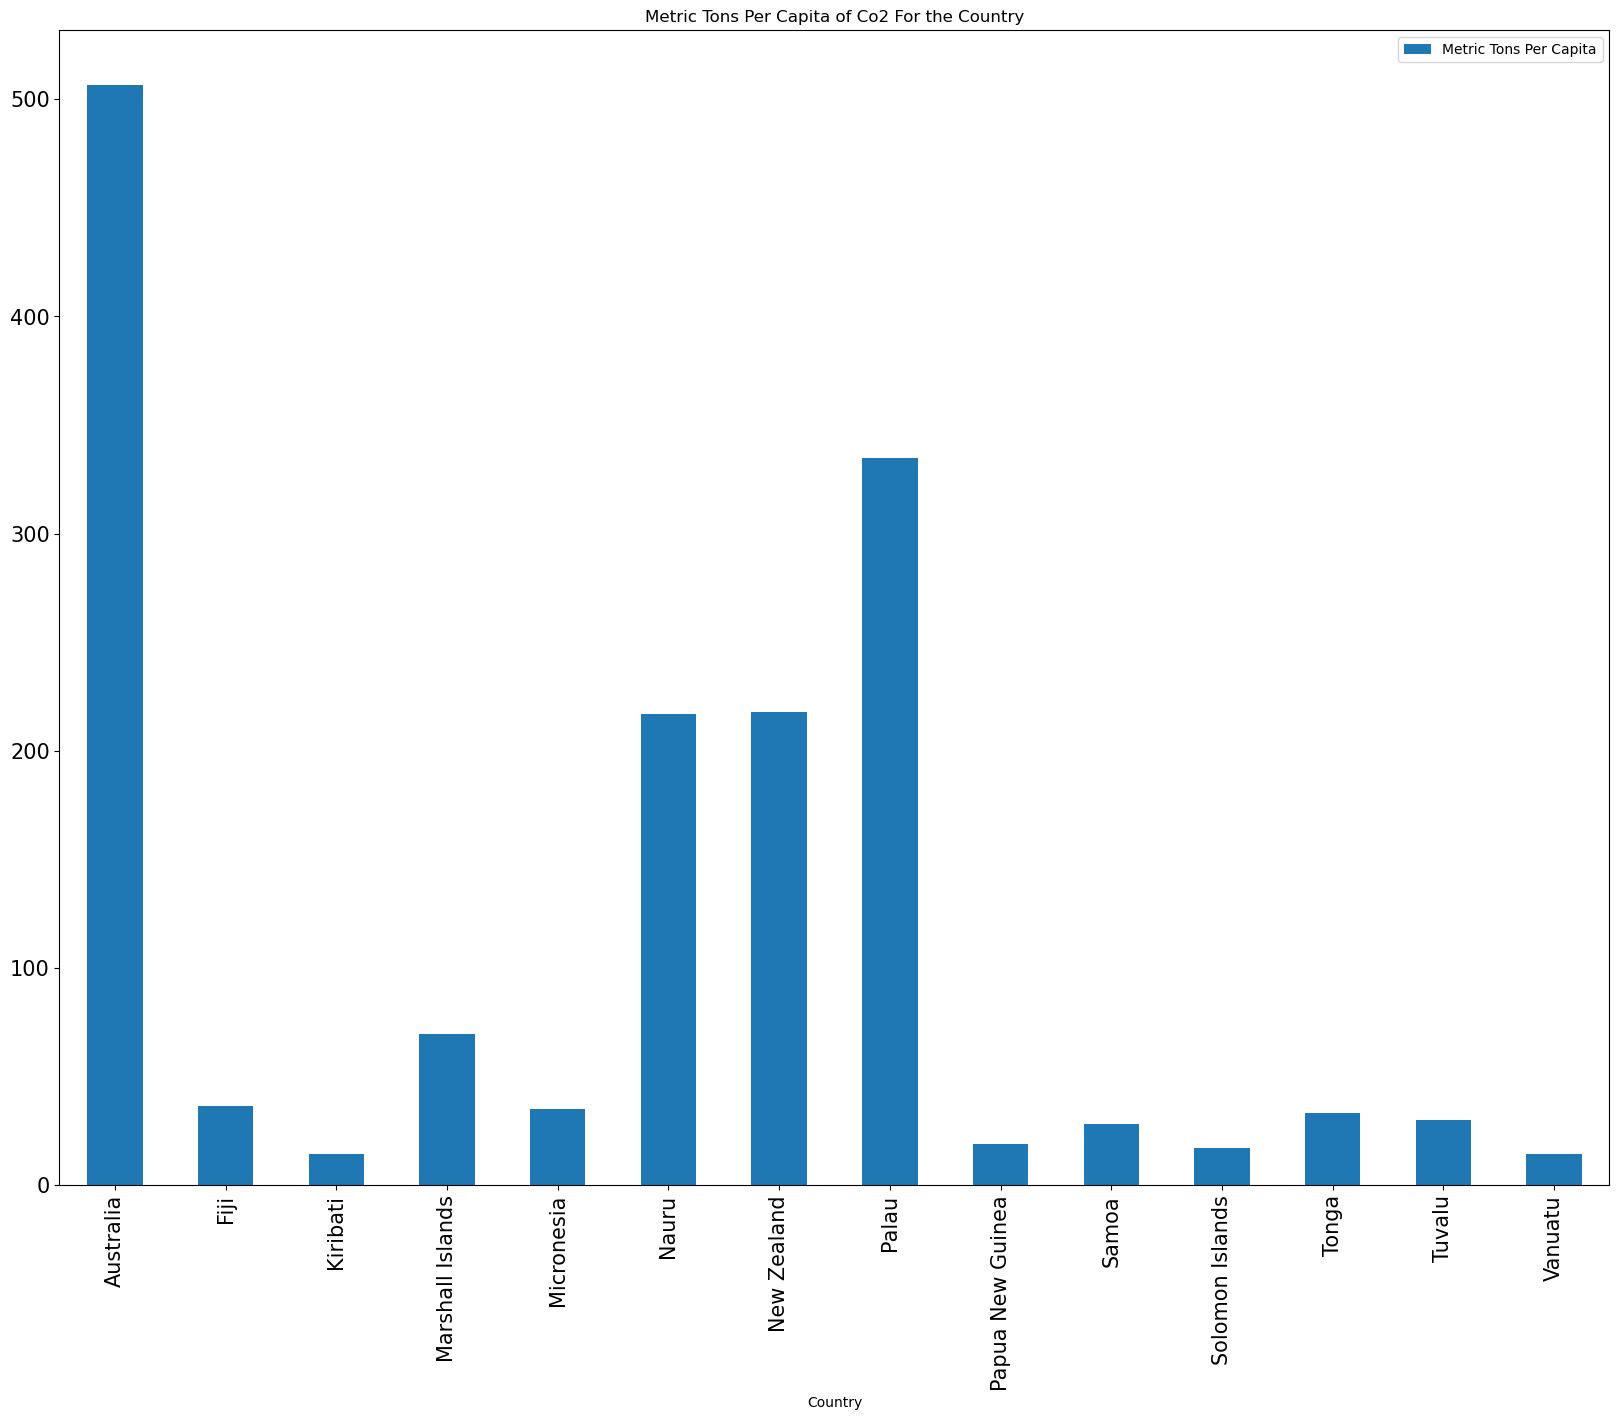

In [30]:
df6=df[df['Region']=='Oceania']
df7= df6.groupby(by='Country').sum()
df7.plot(kind='bar',y='Metric Tons Per Capita',figsize=(20,15),rot=90,
         title='Metric Tons Per Capita of Co2 For the Country',fontsize=15)

<Axes: title={'center': 'Kilotons of Co2 vs Year in Oceania'}, xlabel='year'>

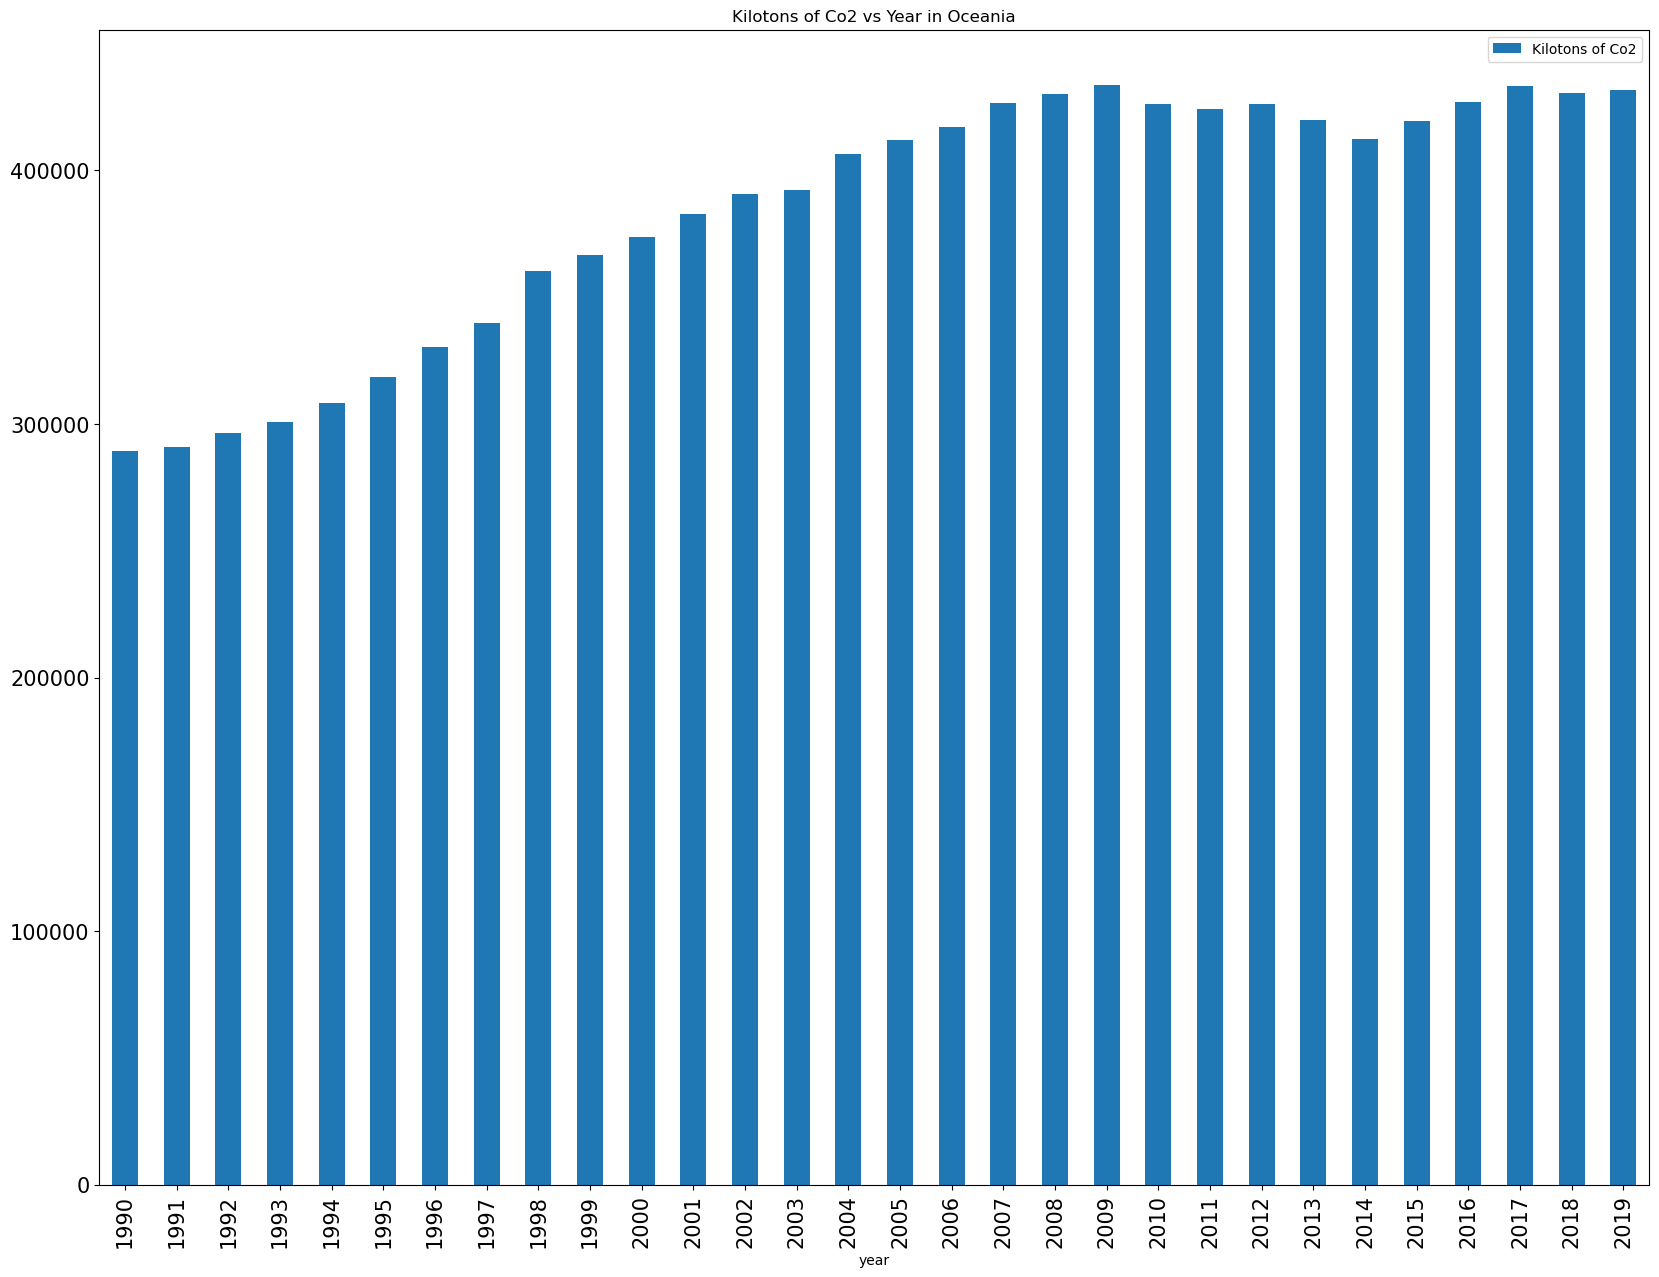

In [31]:
df6a = df6.groupby(by=['year']).sum().reset_index()
df6a.plot(kind='bar',x='year',y='Kilotons of Co2',figsize=(20,15),
          rot=90,title='Kilotons of Co2 vs Year in Oceania',fontsize=15)

### Europe

<Axes: title={'center': 'Kilotons of Co2 For the Country'}, xlabel='Country'>

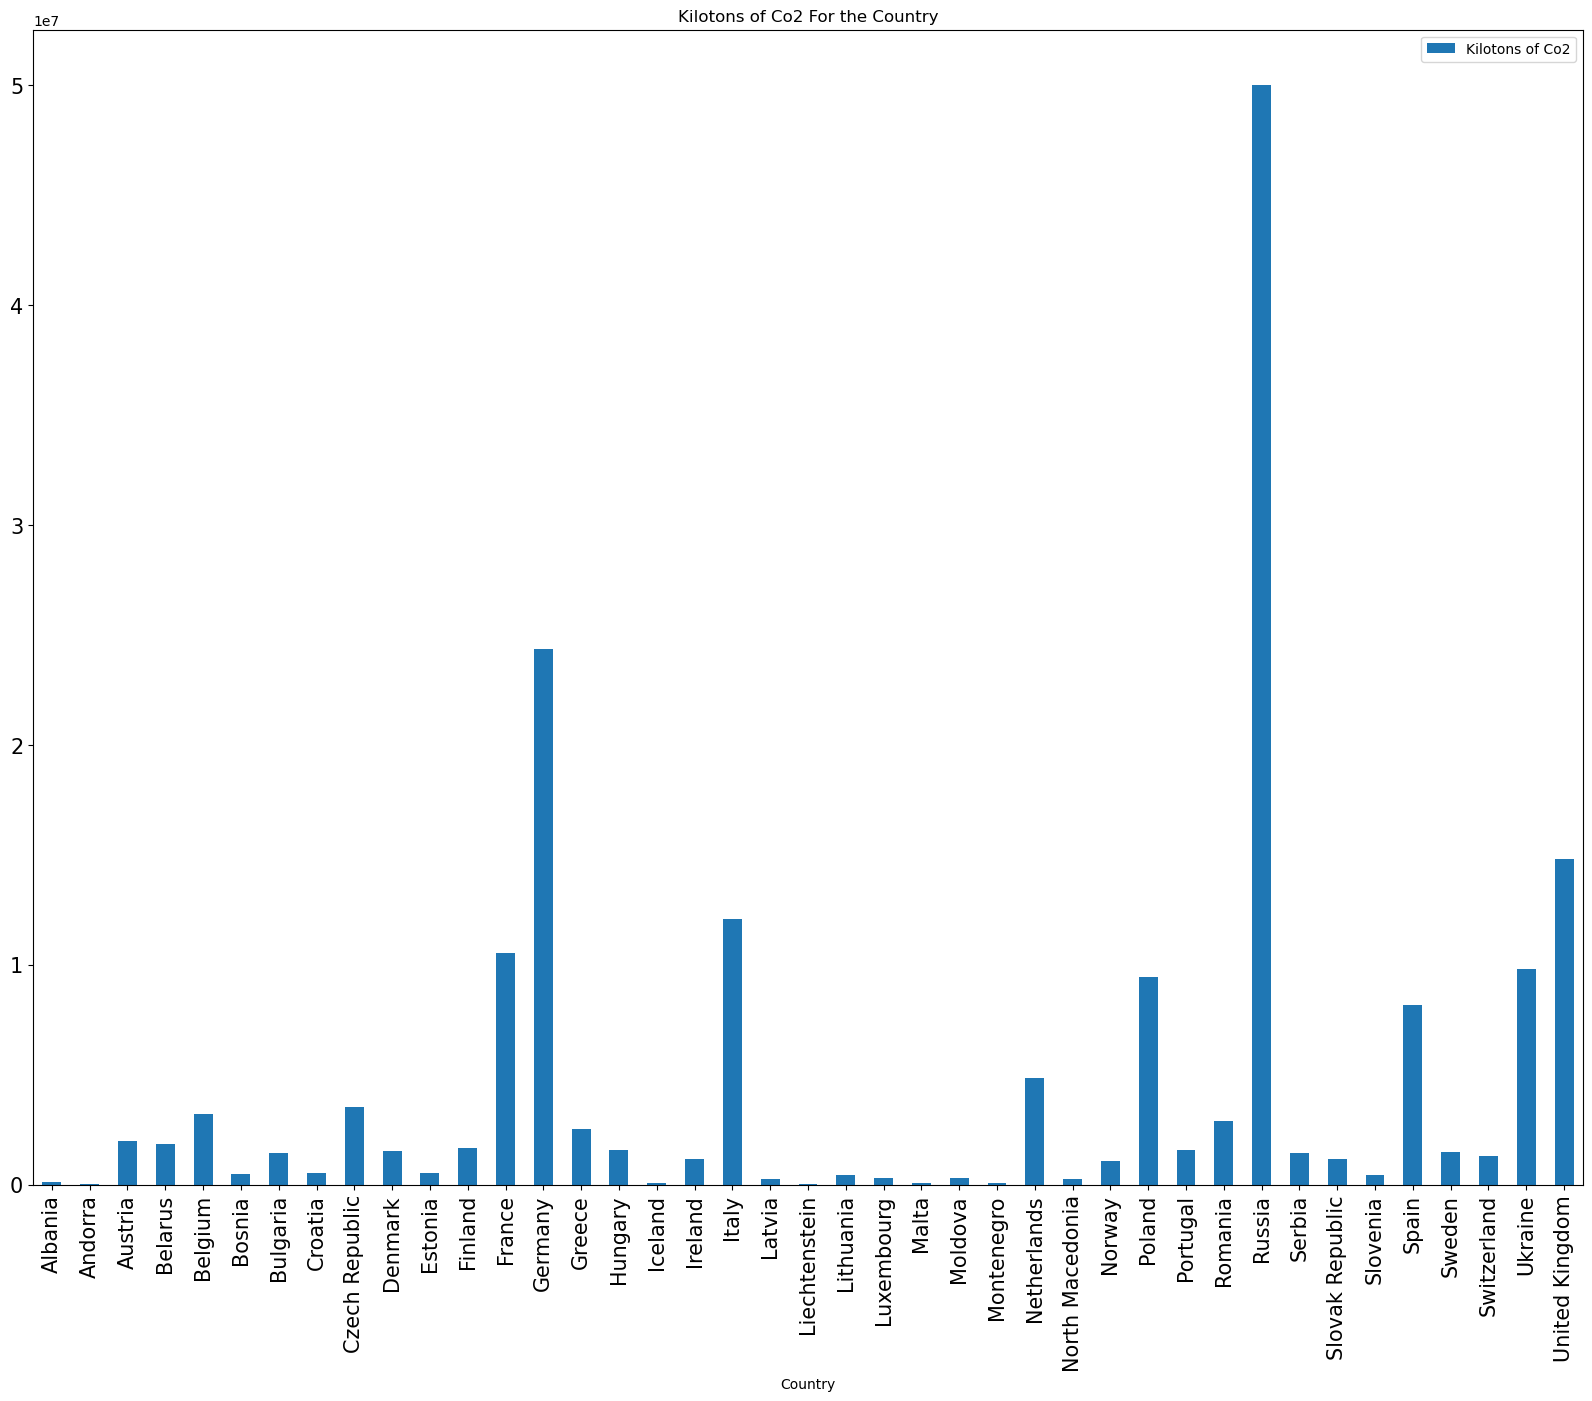

In [32]:
df8=df[df['Region']=='Europe']
df9= df8.groupby(by='Country').sum()
df9.plot(kind='bar',y='Kilotons of Co2',figsize=(20,15),rot=90,
         title='Kilotons of Co2 For the Country',fontsize=15)

<Axes: title={'center': 'Metric Tons Per Capita of Co2 For the Country'}, xlabel='Country'>

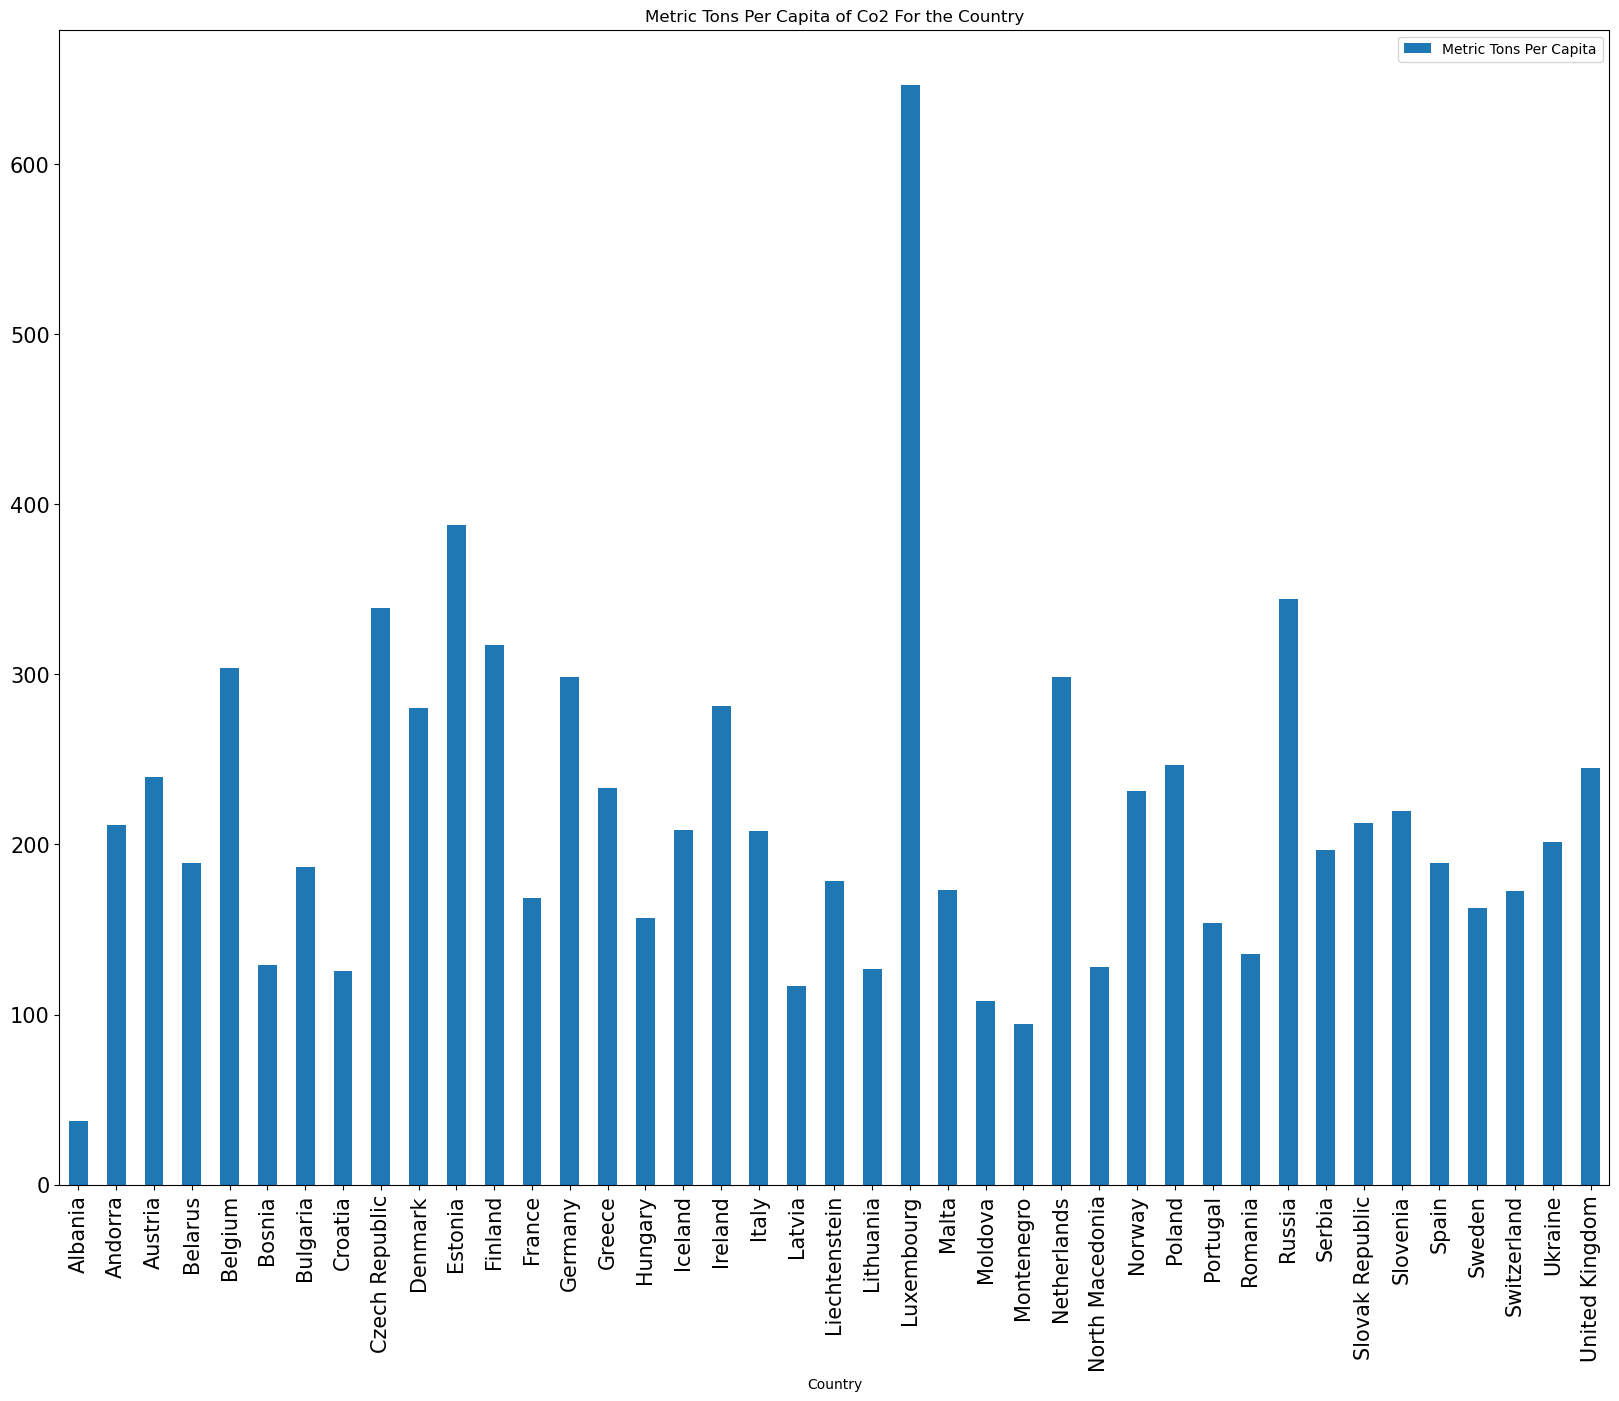

In [33]:
df8=df[df['Region']=='Europe']
df9= df8.groupby(by='Country').sum()
df9.plot(kind='bar',y='Metric Tons Per Capita',figsize=(20,15),rot=90,
         title='Metric Tons Per Capita of Co2 For the Country',fontsize=15)

<Axes: title={'center': 'Kilotons of Co2 vs Year in Europe'}, xlabel='year'>

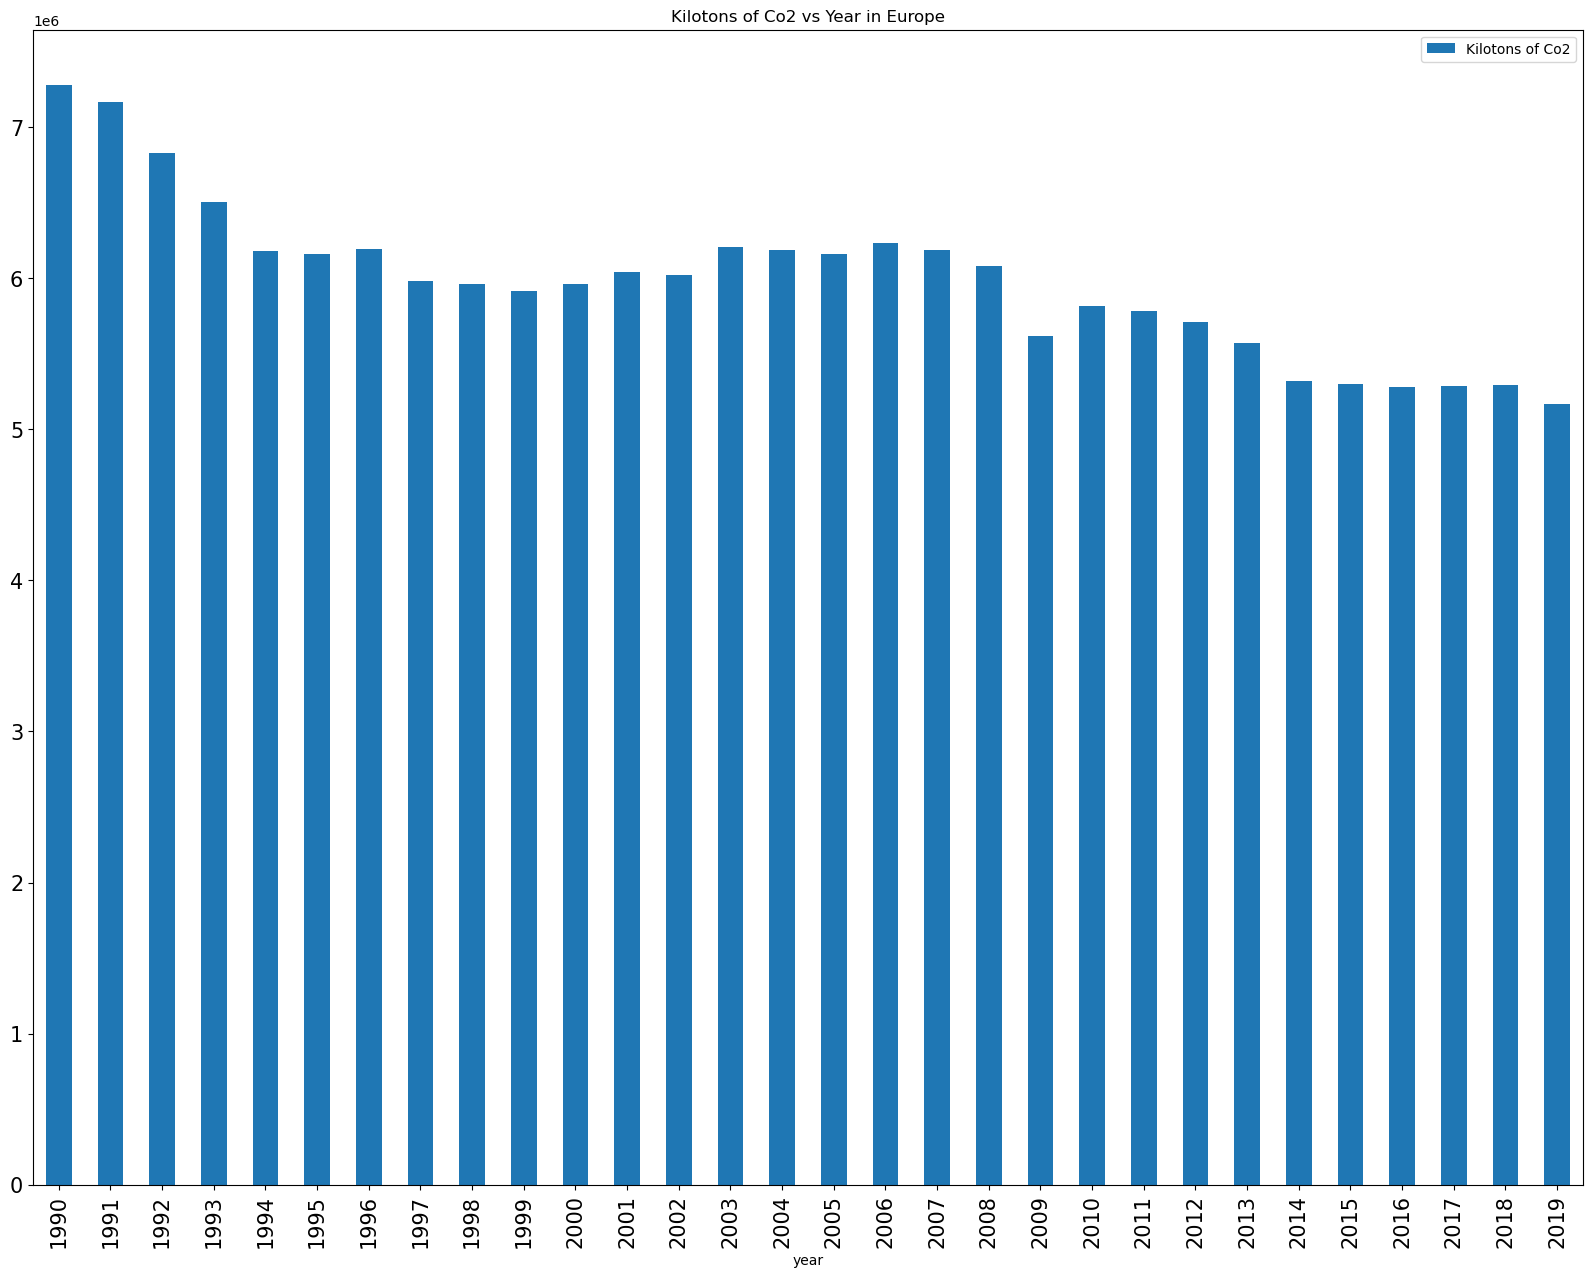

In [34]:
df8a = df8.groupby(by=['year']).sum().reset_index()
df8a.plot(kind='bar',x='year',y='Kilotons of Co2',figsize=(20,15),
          rot=90,title='Kilotons of Co2 vs Year in Europe',fontsize=15)

### Analysis Findings

Over the years, for all regions except Europe and America, the amount of Carbon dioxide has continuously been on the rise.

America and Europe seem to be at a constant emission level.

The highest growth is averagely experienced in the year 2009 with the highest amount of carbon dioxide emmitted in the year 2019 when the dataset has the last entry.


### Recommendations

Alternative sources of fuel with low carbon content to cater for the increasing rate of industrialisation around the world.

Invention of alternative agricultural practices and prohibiting agricultural practices that causes high carbon dioxide emmissions

Afforestation to aid in reducing the carbon content in the atmosphere

Improving the fight against illegal falling of trees, green vegetation takes in carbonn dioxide for photosynthesis.